In [181]:
from keras.preprocessing.image import ImageDataGenerator
batch_size=64
# Define the image transformations here
gen = ImageDataGenerator(horizontal_flip = False,
                         vertical_flip = False,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,
                         zoom_range = 0.1,
                         rotation_range = 10)

In [182]:
%matplotlib inline

import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from ExecutionAttributes import ExecutionAttribute
from keras.utils import plot_model
from skimage import io as io
import cv2
import os
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_fscore_support as score
from keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder

#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

# Execution Attributes
attr = ExecutionAttribute()

# dimensions of our images.
attr.img_width, attr.img_height = 32, 32

# network parameters
#attr.path = 'C:/Users/hp/Downloads/cars_train'
attr.path = '/home/amenegotto/Downloads/cars'
attr.epochs = 200
attr.batch_size = 2
attr.set_dir_names()

if K.image_data_format() == 'channels_first':
    input_s = (3, attr.img_width, attr.img_height)
else:
    input_s = (attr.img_width, attr.img_height, 3)

In [183]:
def load_data(filepath):
    files = pd.read_csv(filepath)
    images = []
    prices = files[['price']]
    labels = []

    for i, r in files.iterrows():
        print(r['path'] + ' - ' + str(r['price']))

        #image = load_img(attr.path + '/' + r['path'])
        #image.thumbnail((attr.img_width, attr.img_height))

        # image = io.imread()
        # image = image.reshape([attr.img_width, attr.img_height, 3])

        image = cv2.imread(attr.path + '/' + r['path'])
        image = cv2.resize(image, (attr.img_width, attr.img_height))
        image = img_to_array(image)
        images.append(image)

        if "barato" in r['path']:
            labels.append(0)
        else:
            labels.append(1)

    return (np.array(images, dtype="float") / 255.0), np.array(prices), np.array(labels)


images_train, prices_train, labels_train = load_data(attr.path + '/train.csv')
images_valid, prices_valid, labels_valid = load_data(attr.path + '/valid.csv')
images_test, prices_test, labels_test = load_data(attr.path + '/test.csv')

print("[INFO] Training image size: {:.2f}MB".format(images_train.nbytes / (1024 * 1000.0)))
print("[INFO] Validation image size: {:.2f}MB".format(images_valid.nbytes / (1024 * 1000.0)))
print("[INFO] Testing image size: {:.2f}MB".format(images_test.nbytes / (1024 * 1000.0)))

train/barato/01003.jpg - 6230
train/barato/01005.jpg - 5925
train/barato/01006.jpg - 8186
train/barato/01007.jpg - 6798
train/barato/01009.jpg - 2355
train/barato/01010.jpg - 7285
train/barato/01012.jpg - 403
train/barato/01014.jpg - 2859
train/barato/01015.jpg - 7136
train/barato/01016.jpg - 9031
train/barato/01017.jpg - 6631
train/barato/01019.jpg - 2011
train/barato/01020.jpg - 9468
train/barato/01025.jpg - 2866
train/barato/01026.jpg - 5383
train/barato/01027.jpg - 3942
train/barato/01029.jpg - 2597
train/barato/01030.jpg - 9729
train/barato/01031.jpg - 22
train/barato/01032.jpg - 6954
train/barato/01033.jpg - 9004
train/barato/01034.jpg - 5591
train/barato/01035.jpg - 7565
train/barato/01036.jpg - 2718
train/barato/01037.jpg - 8651
train/barato/01038.jpg - 1429
train/barato/01039.jpg - 9192
train/barato/01041.jpg - 2909
train/barato/01042.jpg - 4294
train/barato/01043.jpg - 9514
train/barato/01044.jpg - 9114
train/barato/01045.jpg - 2567
train/barato/01047.jpg - 4465
train/barato/

In [184]:
#for i in range(0,len(images_train)):
#    plt.imshow(images_train[i])

#plt.show()

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)

    plt.show()

#show_images(images_train[0:50], 3)
#fig=plt.figure()

#for i in range(0,len(images_train)):
#    img = images_train[i]
#    fig.add_subplot(i,2,1)
#    plt.imshow(img)
    
#plot.show()    

In [185]:
foo = gen.flow(images_train, labels_train,  batch_size=attr.batch_size, seed=666)

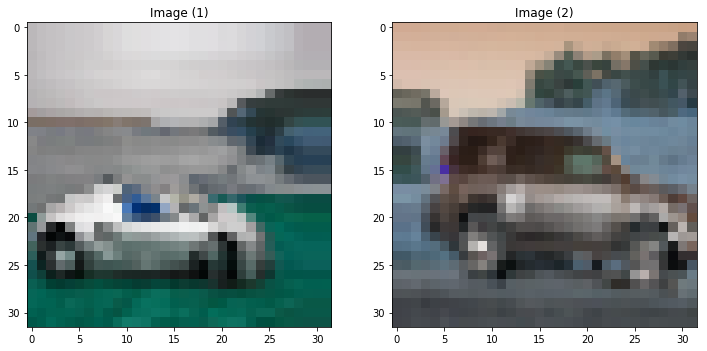

In [186]:
foo2 = foo.next()

#print(foo2[0])
#print(foo2[0].shape)

show_images(foo2[0], 1)

#plt.imshow(image_x)

#plt.show()
#for i in range(0, 2):
#	plt.subplot(330 + 1 + i)
#	plt.imshow(foo[i], cmap=plt.get_cmap('gray'))
# show the plot


In [187]:
def gen_flow_for_two_inputs(X1, X2, y):
    genX1 = gen.flow(X1, y,  batch_size=attr.batch_size, seed=666)
    genX2 = gen.flow(X1, X2, batch_size=attr.batch_size, seed=666)
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            #Assert arrays are equal - this was for peace of mind, but slows down training
            #np.testing.assert_array_equal(X1i[0],X2i[0])
            print("\n\n\n\n====================Images==========================")                        
            show_images(X1i[0], 1)
            print("\n\n====================Prices==========================")
            print(X2i[1])
            print("\n\n====================Labels==========================")
            print(X1i[1])
            yield [X1i[0], X2i[1]], X1i[1]

In [188]:
gen_flow = gen_flow_for_two_inputs(images_train, prices_train, labels_train)

In [189]:
visible = Input(shape=input_s)
conv1 = Conv2D(32, (3,3), activation='relu')(visible)
bn1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(bn1)
conv2 = Conv2D(16, (3,3), activation='relu')(pool1)
bn2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(bn2)
flat = Flatten()(pool2)

# as in this POC we have only one auxiliary variable, there's no need for another ANN, just concat in flatten before FC
attributes_input = Input(shape=(1,))
concat = concatenate([flat, attributes_input])

hidden1 = Dense(10, activation='relu')(concat)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=[visible, attributes_input], outputs=output)


[INFO] training model...
Epoch 1/2




====================Images==========================


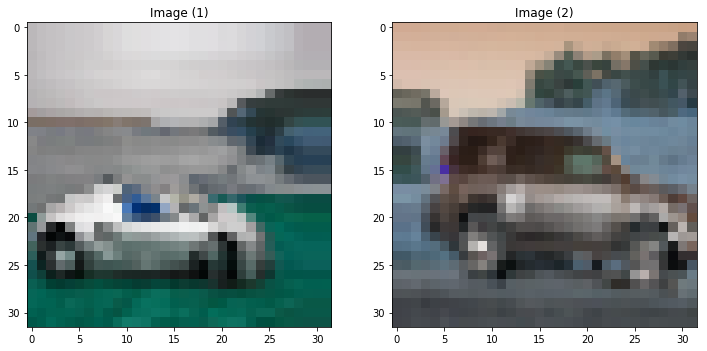



====================Prices==========================
[[588583]
 [  2409]]


====================Labels==========================
[1 0]




====================Images==========================


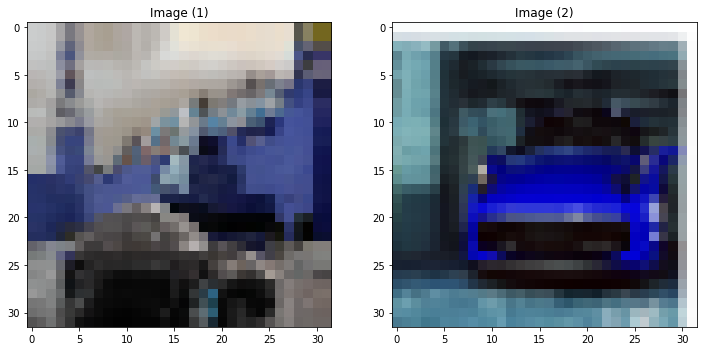



====================Prices==========================
[[978085]
 [242291]]


====================Labels==========================
[1 1]




====================Images==========================


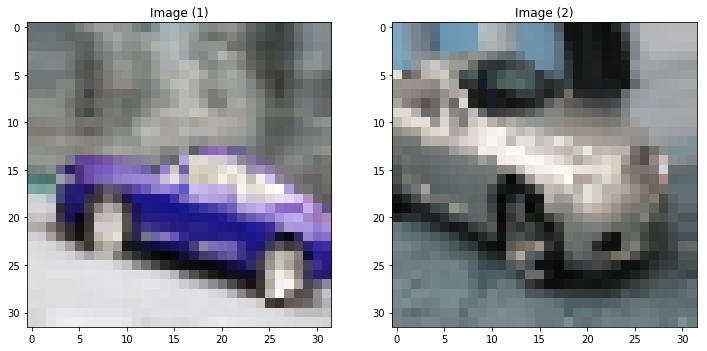



====================Prices==========================
[[974187]
 [687336]]


====================Labels==========================
[1 1]




====================Images==========================


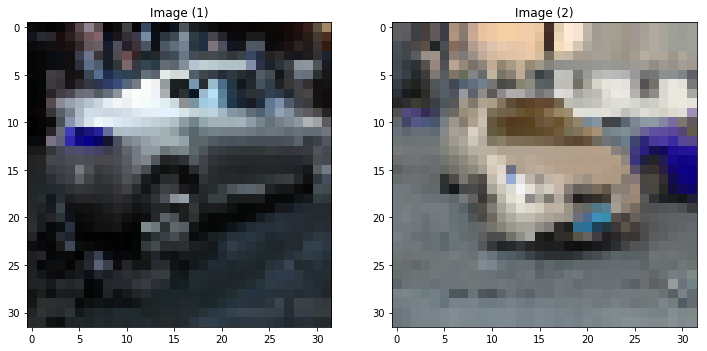



====================Prices==========================
[[20197]
 [ 7565]]


====================Labels==========================
[1 0]




====================Images==========================


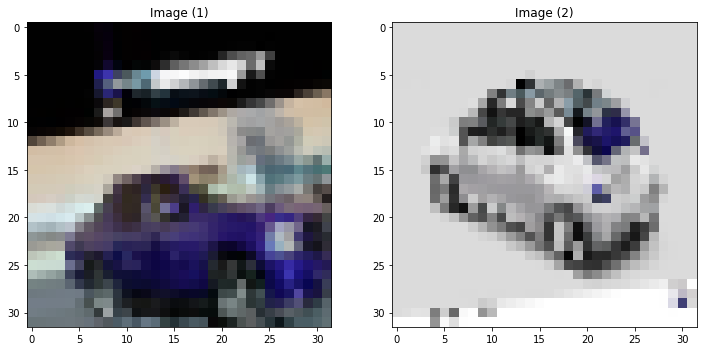



====================Prices==========================
[[5925]
 [2859]]


====================Labels==========================
[0 0]




====================Images==========================


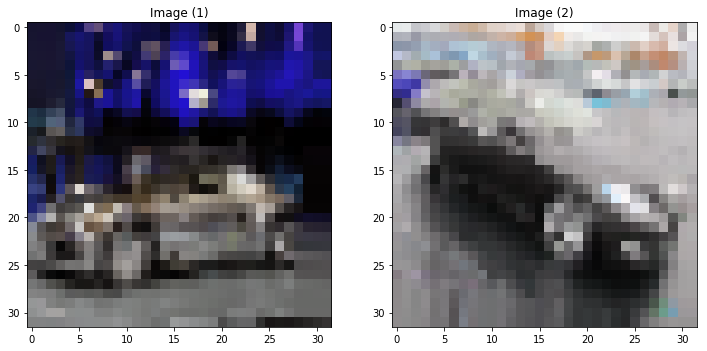



====================Prices==========================
[[982190]
 [  6798]]


====================Labels==========================
[1 0]




====================Images==========================


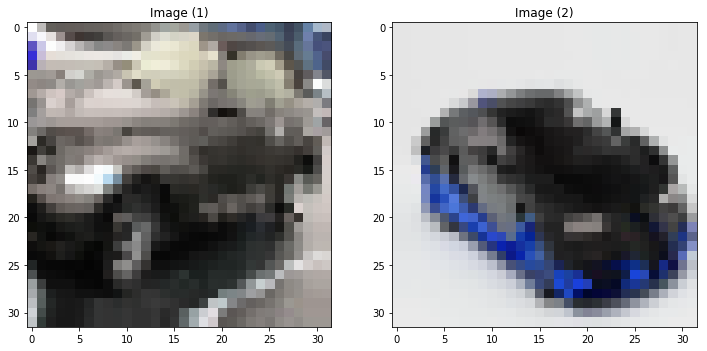



====================Prices==========================
[[  2987]
 [412084]]


====================Labels==========================
[0 1]




====================Images==========================


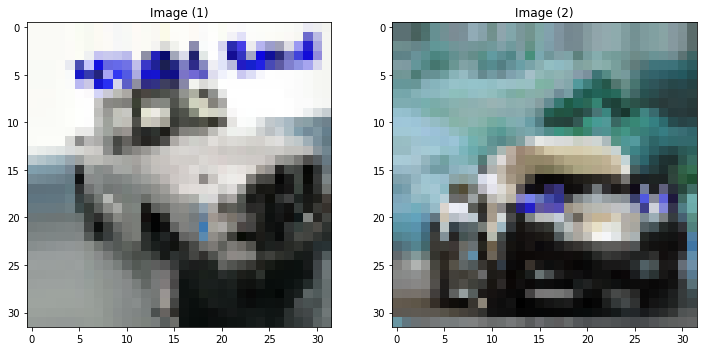



====================Prices==========================
[[  9114]
 [808864]]


====================Labels==========================
[0 1]




====================Images==========================
 6/85 [=>............................] - ETA: 48s - loss: 9.4022 - acc: 0.4167

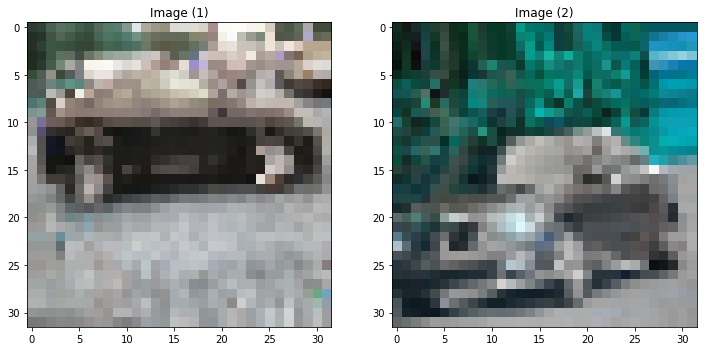



====================Prices==========================
[[  9832]
 [924721]]


====================Labels==========================
[0 1]




====================Images==========================
 9/85 [==>...........................] - ETA: 32s - loss: 8.9545 - acc: 0.4444

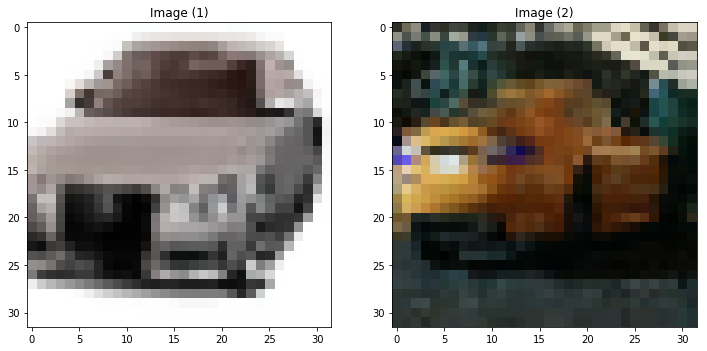



====================Prices==========================
[[277451]
 [ 51505]]


====================Labels==========================
[1 1]




====================Images==========================
10/85 [==>...........................] - ETA: 32s - loss: 9.6709 - acc: 0.4000

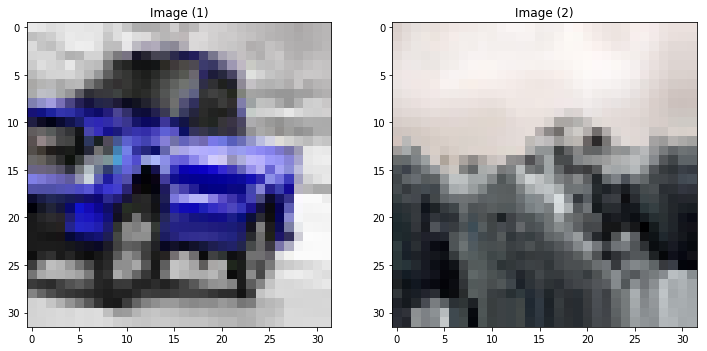



====================Prices==========================
[[1723]
 [ 980]]


====================Labels==========================
[0 0]




====================Images==========================
11/85 [==>...........................] - ETA: 31s - loss: 8.7917 - acc: 0.4545

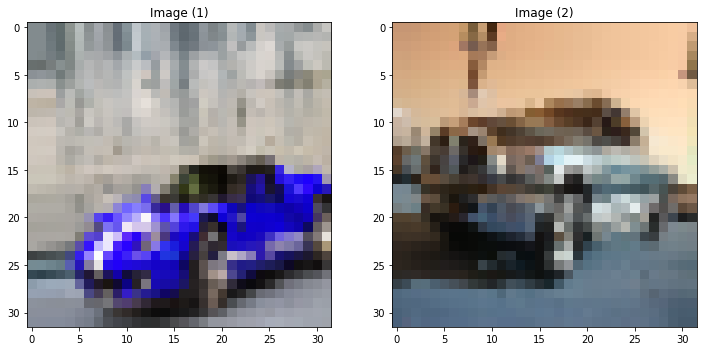



====================Prices==========================
[[131838]
 [  5371]]


====================Labels==========================
[1 0]




====================Images==========================
12/85 [===>..........................] - ETA: 30s - loss: 8.7306 - acc: 0.4583

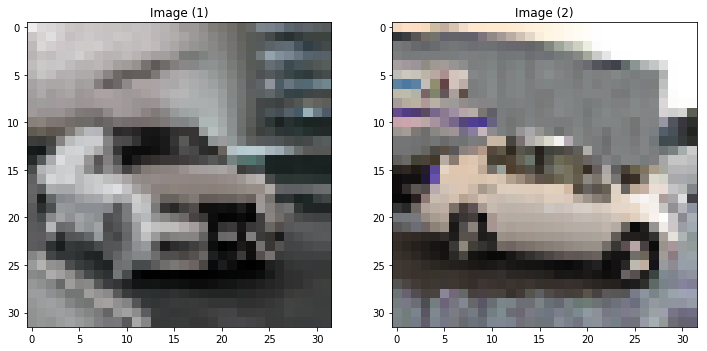



====================Prices==========================
[[822779]
 [  8486]]


====================Labels==========================
[1 0]




====================Images==========================
13/85 [===>..........................] - ETA: 30s - loss: 8.6790 - acc: 0.4615

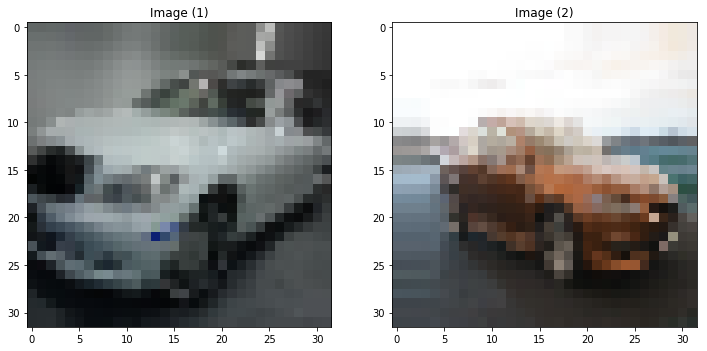



====================Prices==========================
[[67472]
 [ 4099]]


====================Labels==========================
[1 0]




====================Images==========================
14/85 [===>..........................] - ETA: 29s - loss: 8.6347 - acc: 0.4643

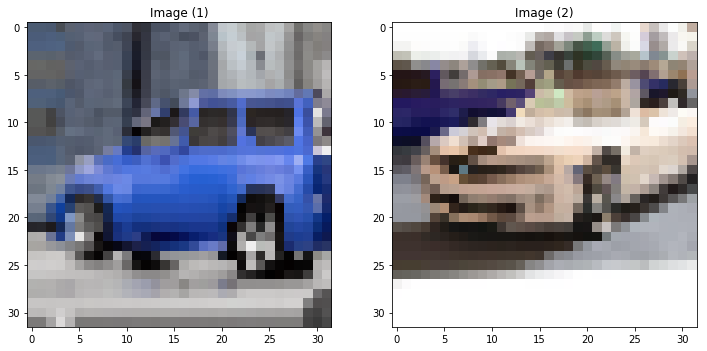



====================Prices==========================
[[  5250]
 [478907]]


====================Labels==========================
[0 1]




====================Images==========================
15/85 [====>.........................] - ETA: 29s - loss: 8.5963 - acc: 0.4667

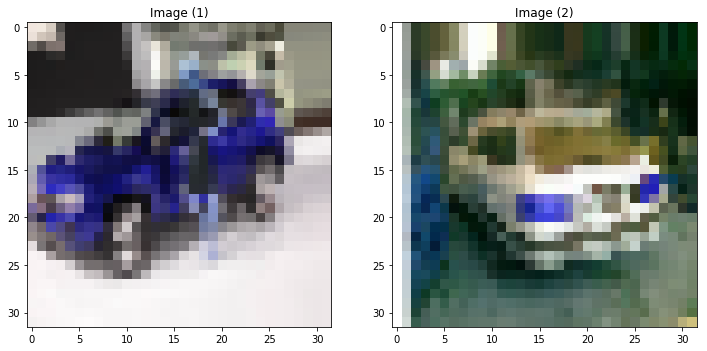



====================Prices==========================
[[2567]
 [9027]]


====================Labels==========================
[0 0]




====================Images==========================
16/85 [====>.........................] - ETA: 28s - loss: 8.0590 - acc: 0.5000

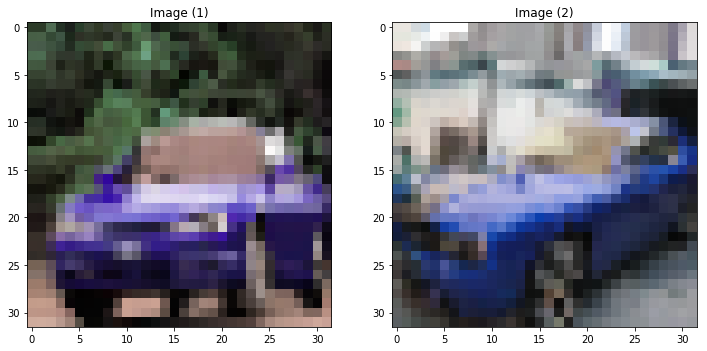



====================Prices==========================
[[  6525]
 [173013]]


====================Labels==========================
[0 1]




====================Images==========================
17/85 [=====>........................] - ETA: 28s - loss: 8.0590 - acc: 0.5000

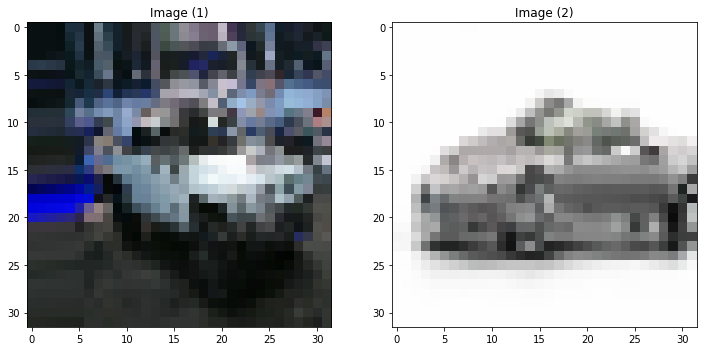



====================Prices==========================
[[  9514]
 [435346]]


====================Labels==========================
[0 1]




====================Images==========================
18/85 [=====>........................] - ETA: 27s - loss: 8.0590 - acc: 0.5000

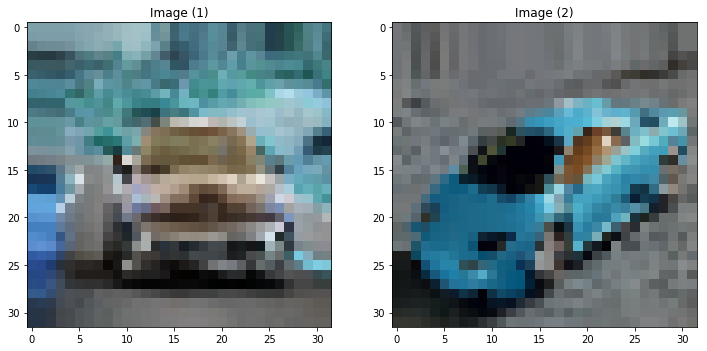



====================Prices==========================
[[823246]
 [866495]]


====================Labels==========================
[1 1]




====================Images==========================
19/85 [=====>........................] - ETA: 27s - loss: 8.4832 - acc: 0.4737

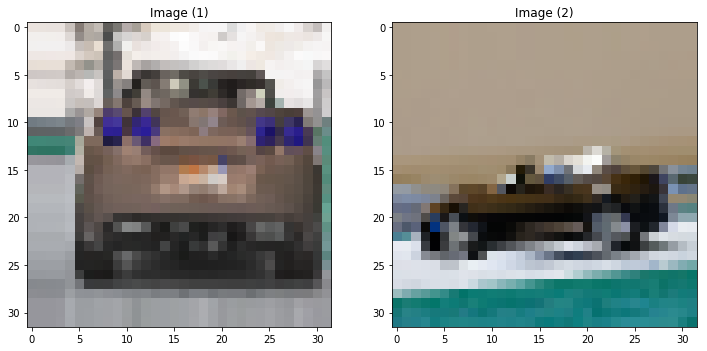



====================Prices==========================
[[944072]
 [139177]]


====================Labels==========================
[1 1]




====================Images==========================
20/85 [======>.......................] - ETA: 26s - loss: 8.8650 - acc: 0.4500

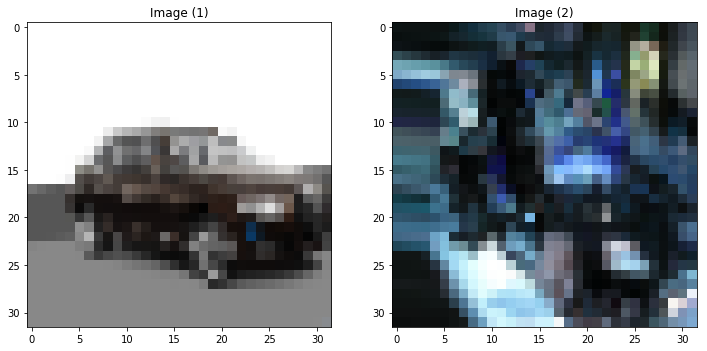



====================Prices==========================
[[436384]
 [643521]]


====================Labels==========================
[1 1]




====================Images==========================
21/85 [======>.......................] - ETA: 26s - loss: 9.2103 - acc: 0.4286

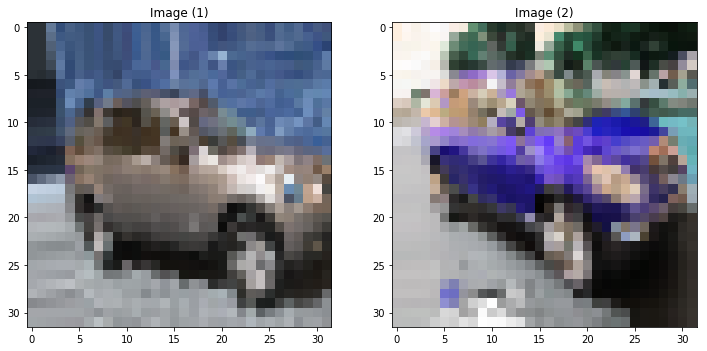



====================Prices==========================
[[9454]
 [3942]]


====================Labels==========================
[0 0]




====================Images==========================
22/85 [======>.......................] - ETA: 25s - loss: 8.7917 - acc: 0.4545

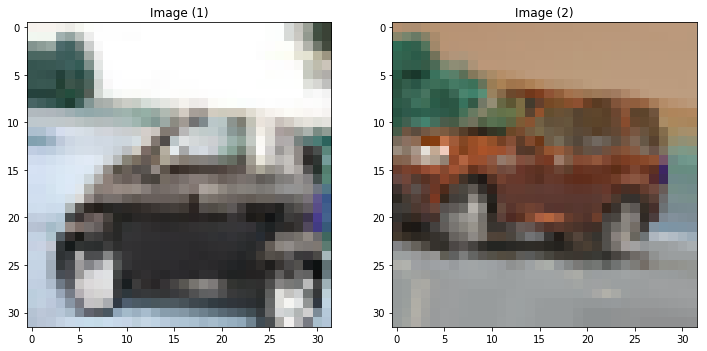



====================Prices==========================
[[  3800]
 [926553]]


====================Labels==========================
[0 1]




====================Images==========================
23/85 [=======>......................] - ETA: 25s - loss: 8.7598 - acc: 0.4565

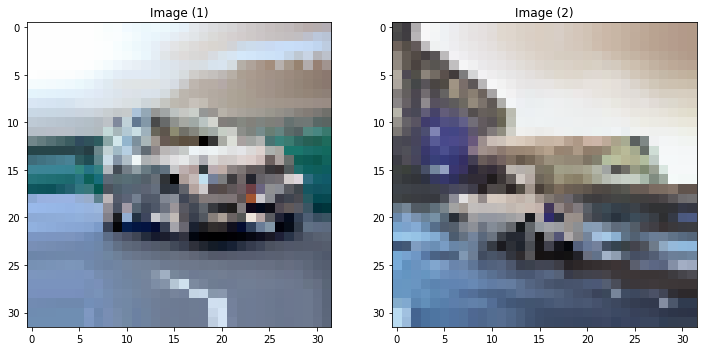



====================Prices==========================
[[376502]
 [  6230]]


====================Labels==========================
[1 0]




====================Images==========================
24/85 [=======>......................] - ETA: 24s - loss: 8.7306 - acc: 0.4583

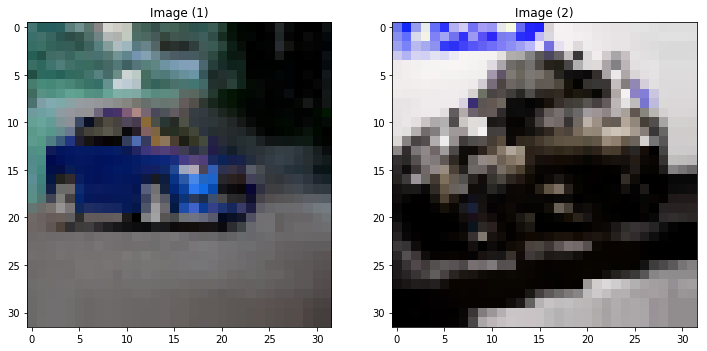



====================Prices==========================
[[  5802]
 [437339]]


====================Labels==========================
[0 1]




====================Images==========================
25/85 [=======>......................] - ETA: 24s - loss: 8.7038 - acc: 0.4600

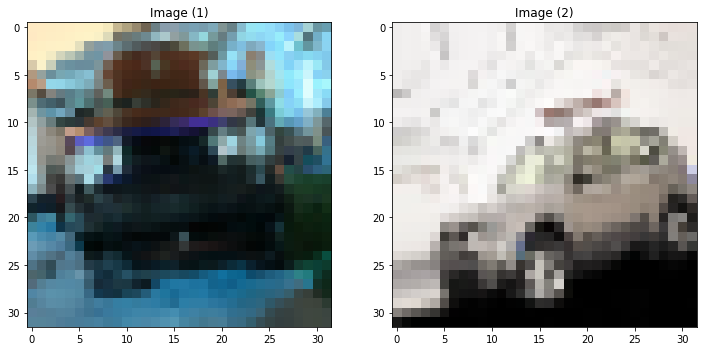



====================Prices==========================
[[2537]
 [1239]]


====================Labels==========================
[0 0]
26/85 [========>.....................] - ETA: 23s - loss: 8.3690 - acc: 0.4808



====================Images==========================


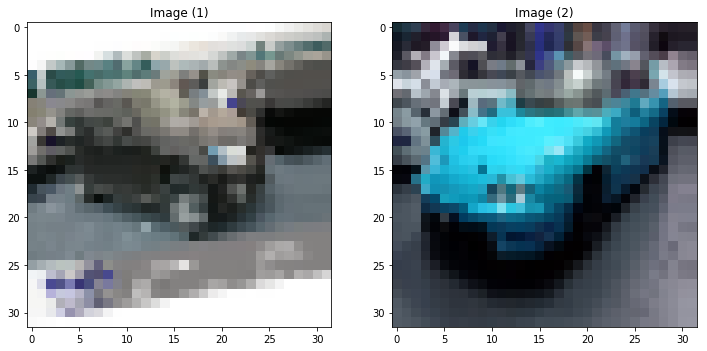



====================Prices==========================
[[1077]
 [ 403]]


====================Labels==========================
[0 0]




====================Images==========================
27/85 [========>.....................] - ETA: 23s - loss: 8.0590 - acc: 0.5000

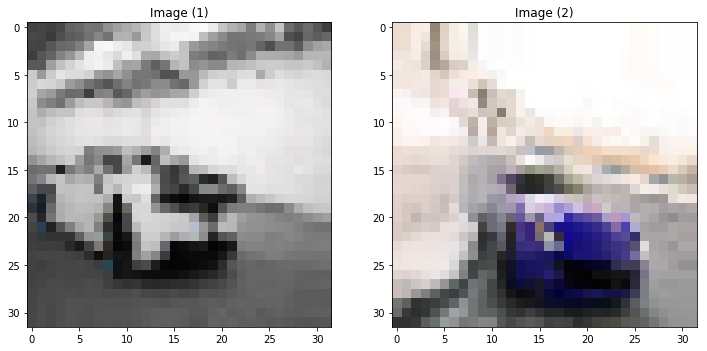



====================Prices==========================
[[676540]
 [811858]]


====================Labels==========================
[1 1]




====================Images==========================
28/85 [========>.....................] - ETA: 23s - loss: 8.3469 - acc: 0.4821

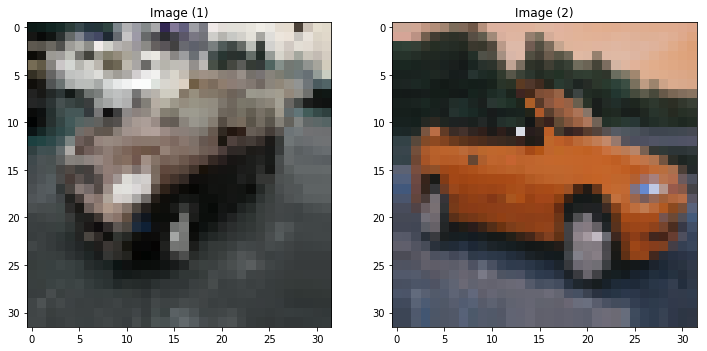



====================Prices==========================
[[4465]
 [4347]]


====================Labels==========================
[0 0]




====================Images==========================
29/85 [=========>....................] - ETA: 22s - loss: 8.0590 - acc: 0.5000

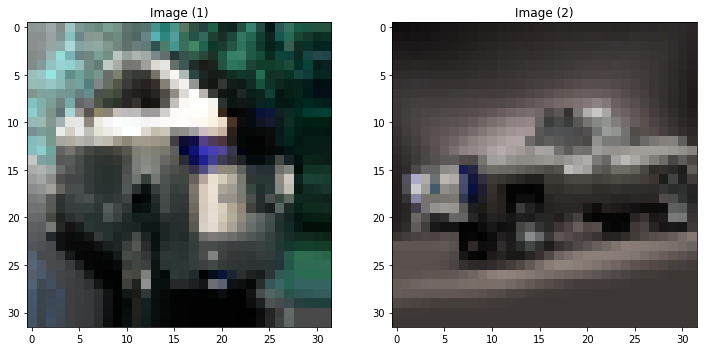



====================Prices==========================
[[552650]
 [  1596]]


====================Labels==========================
[1 0]




====================Images==========================
30/85 [=========>....................] - ETA: 22s - loss: 8.0590 - acc: 0.5000

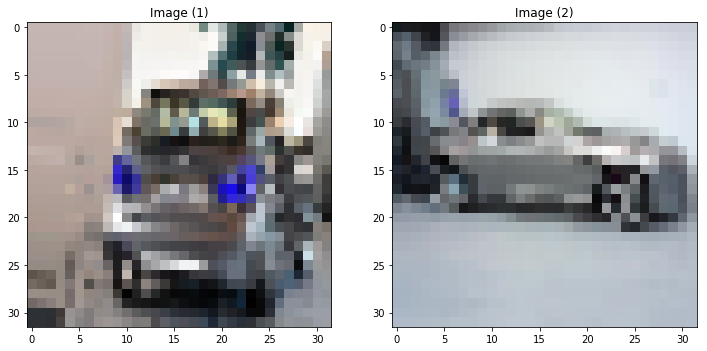



====================Prices==========================
[[ 9007]
 [26534]]


====================Labels==========================
[0 1]




====================Images==========================
31/85 [=========>....................] - ETA: 21s - loss: 8.0590 - acc: 0.5000

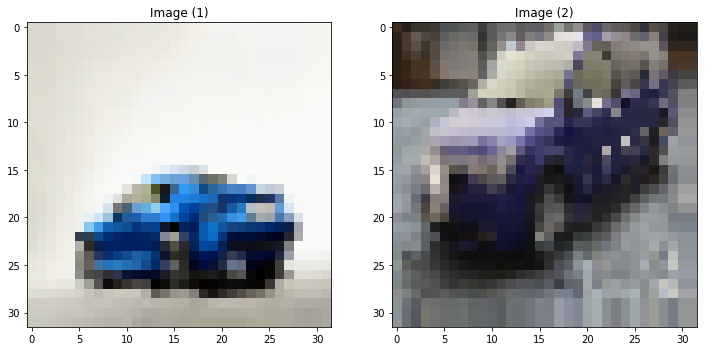



====================Prices==========================
[[990521]
 [  6032]]


====================Labels==========================
[1 0]
32/85 [==========>...................] - ETA: 21s - loss: 8.0590 - acc: 0.5000



====================Images==========================


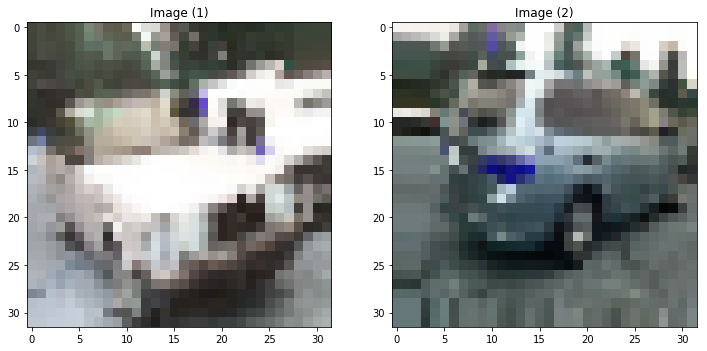



====================Prices==========================
[[7136]
 [6631]]


====================Labels==========================
[0 0]




====================Images==========================
33/85 [==========>...................] - ETA: 20s - loss: 7.8148 - acc: 0.5152

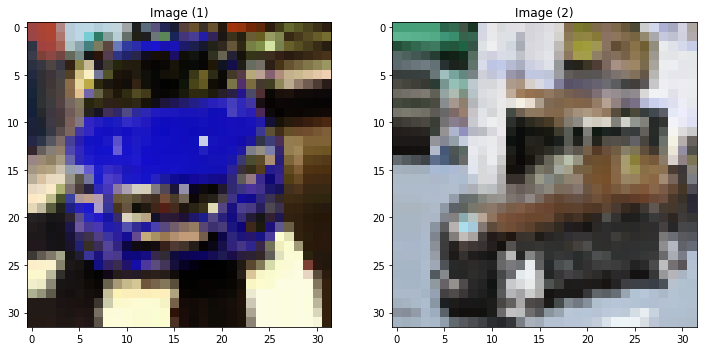



====================Prices==========================
[[747555]
 [  4294]]


====================Labels==========================
[1 0]




====================Images==========================
34/85 [===========>..................] - ETA: 20s - loss: 7.8220 - acc: 0.5147

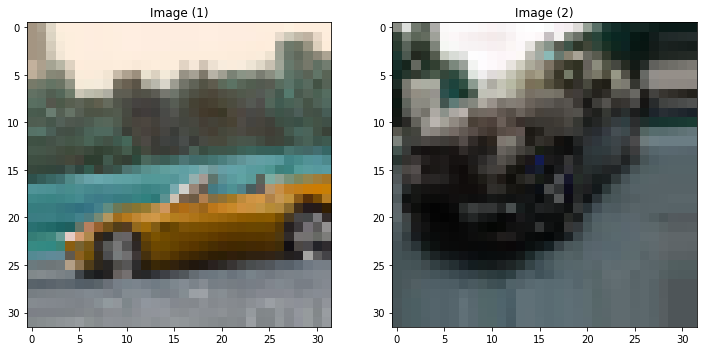



====================Prices==========================
[[431075]
 [730904]]


====================Labels==========================
[1 1]




====================Images==========================
35/85 [===========>..................] - ETA: 20s - loss: 8.0590 - acc: 0.5000

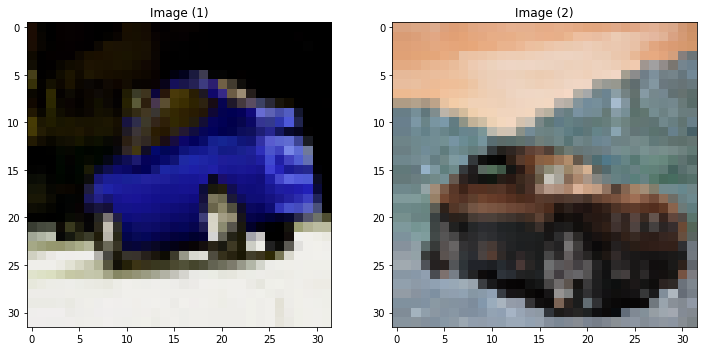



====================Prices==========================
[[  6663]
 [256523]]


====================Labels==========================
[0 1]




====================Images==========================
36/85 [===========>..................] - ETA: 19s - loss: 8.0590 - acc: 0.5000

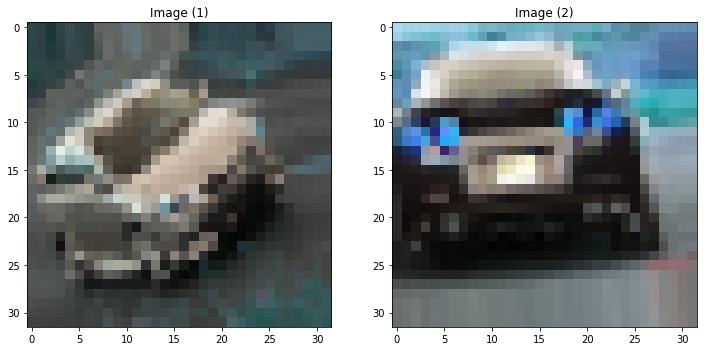



====================Prices==========================
[[   160]
 [255762]]


====================Labels==========================
[0 1]




====================Images==========================
37/85 [============>.................] - ETA: 19s - loss: 8.0590 - acc: 0.5000

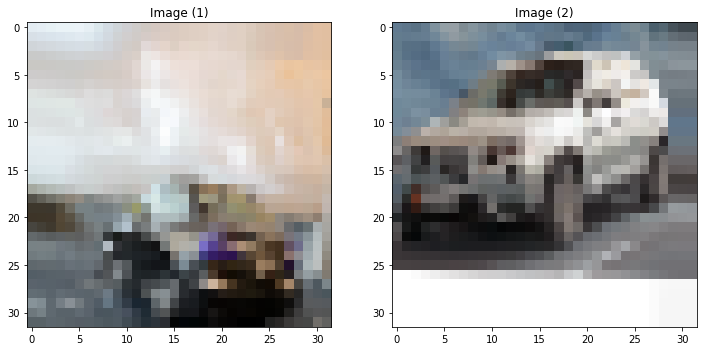



====================Prices==========================
[[488051]
 [  3126]]


====================Labels==========================
[1 0]




====================Images==========================
38/85 [============>.................] - ETA: 18s - loss: 8.0590 - acc: 0.5000

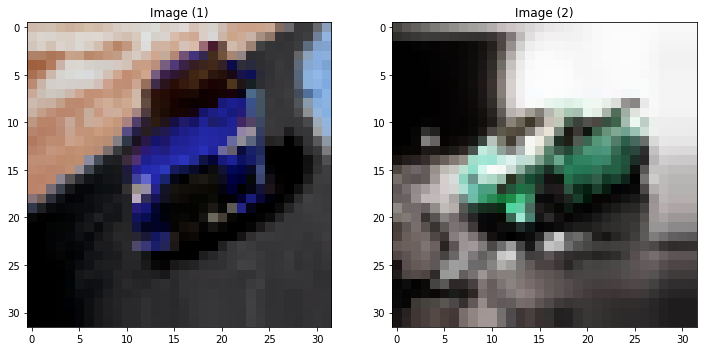



====================Prices==========================
[[  2430]
 [210950]]


====================Labels==========================
[0 1]




====================Images==========================
39/85 [============>.................] - ETA: 18s - loss: 8.0590 - acc: 0.5000

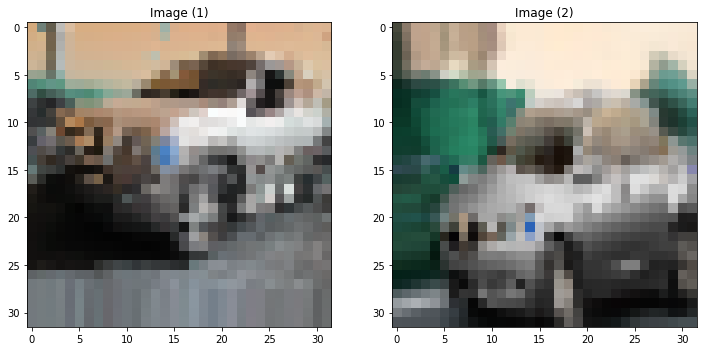



====================Prices==========================
[[9729]
 [2866]]


====================Labels==========================
[0 0]




====================Images==========================
40/85 [=============>................] - ETA: 17s - loss: 7.8576 - acc: 0.5125

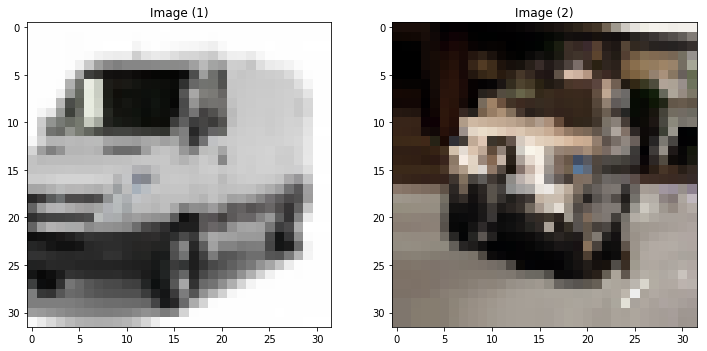



====================Prices==========================
[[2620]
 [7293]]


====================Labels==========================
[0 0]




====================Images==========================
41/85 [=============>................] - ETA: 17s - loss: 7.6659 - acc: 0.5244

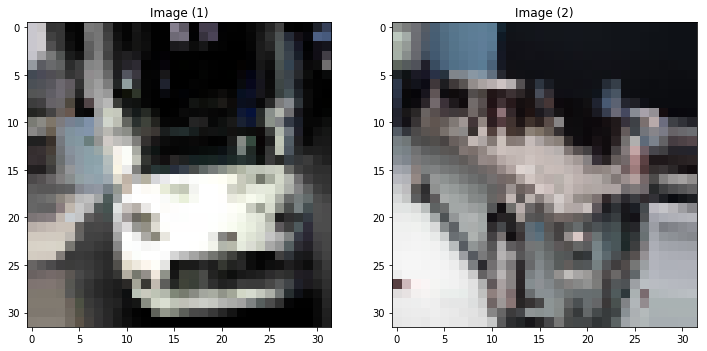



====================Prices==========================
[[311904]
 [515991]]


====================Labels==========================
[1 1]




====================Images==========================
42/85 [=============>................] - ETA: 17s - loss: 7.8672 - acc: 0.5119

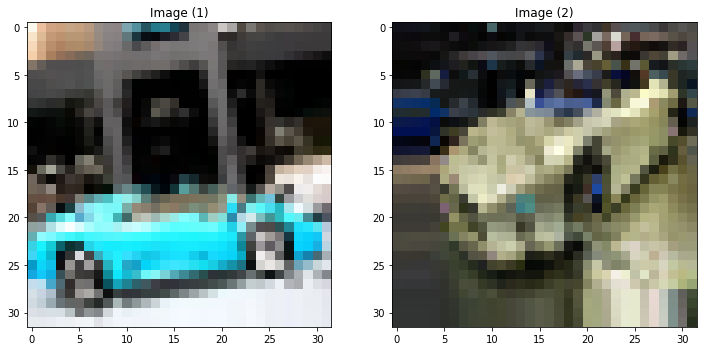



====================Prices==========================
[[943462]
 [204287]]


====================Labels==========================
[1 1]




====================Images==========================
43/85 [==============>...............] - ETA: 16s - loss: 8.0590 - acc: 0.5000

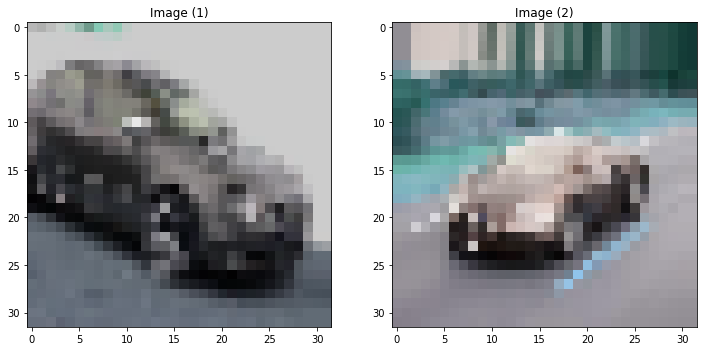



====================Prices==========================
[[  8831]
 [940192]]


====================Labels==========================
[0 1]




====================Images==========================
44/85 [==============>...............] - ETA: 16s - loss: 8.0590 - acc: 0.5000

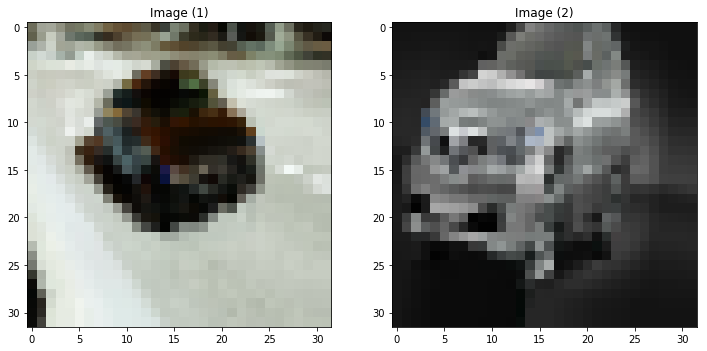



====================Prices==========================
[[434346]
 [    22]]


====================Labels==========================
[1 0]




====================Images==========================
45/85 [==============>...............] - ETA: 15s - loss: 8.0591 - acc: 0.5000

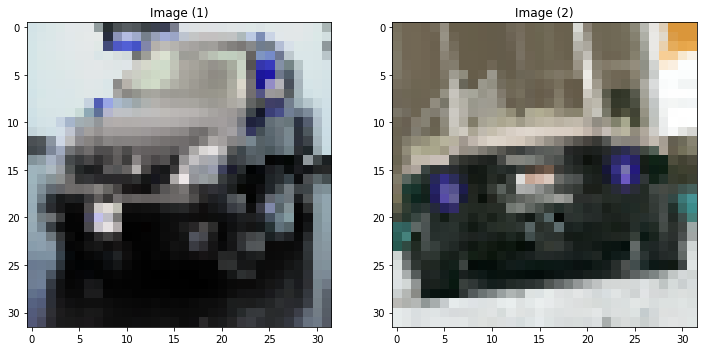



====================Prices==========================
[[  2358]
 [515664]]


====================Labels==========================
[0 1]




====================Images==========================
46/85 [===============>..............] - ETA: 15s - loss: 8.0591 - acc: 0.5000

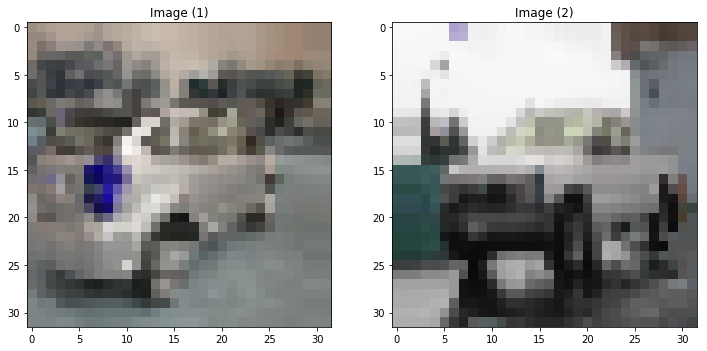



====================Prices==========================
[[9468]
 [2355]]


====================Labels==========================
[0 0]




====================Images==========================
47/85 [===============>..............] - ETA: 15s - loss: 7.8876 - acc: 0.5106

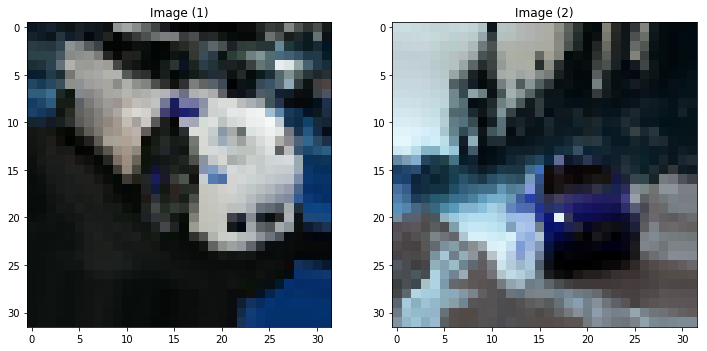



====================Prices==========================
[[318794]
 [674012]]


====================Labels==========================
[1 1]




====================Images==========================
48/85 [===============>..............] - ETA: 14s - loss: 8.0591 - acc: 0.5000

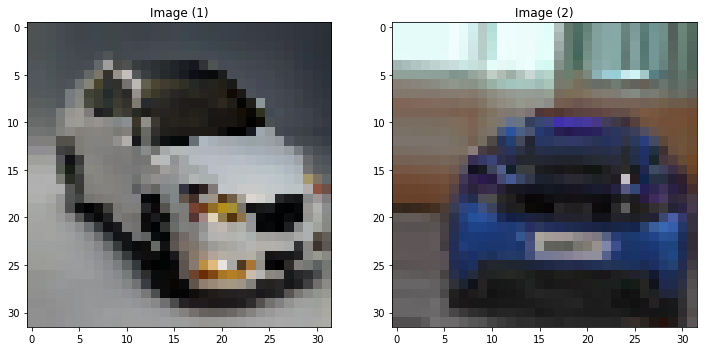



====================Prices==========================
[[  1429]
 [702558]]


====================Labels==========================
[0 1]




====================Images==========================
49/85 [================>.............] - ETA: 14s - loss: 8.0591 - acc: 0.5000

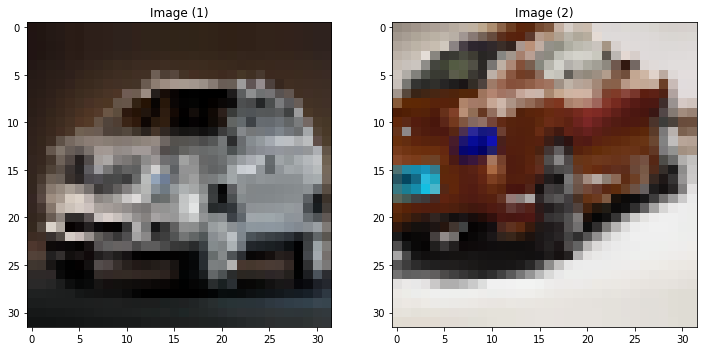



====================Prices==========================
[[273151]
 [330169]]


====================Labels==========================
[1 1]




====================Images==========================
50/85 [================>.............] - ETA: 13s - loss: 8.2202 - acc: 0.4900

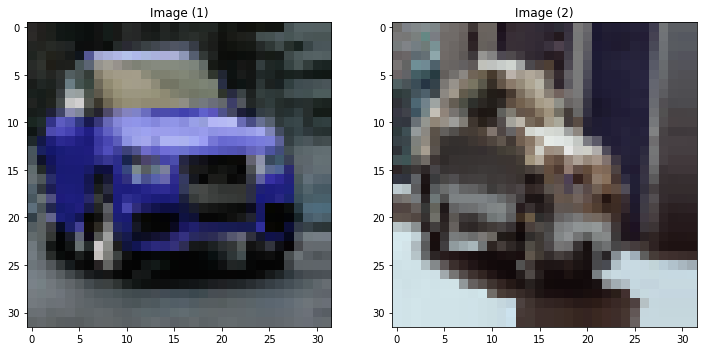



====================Prices==========================
[[131545]
 [  5591]]


====================Labels==========================
[1 0]
51/85 [=================>............] - ETA: 13s - loss: 8.2171 - acc: 0.4902



====================Images==========================


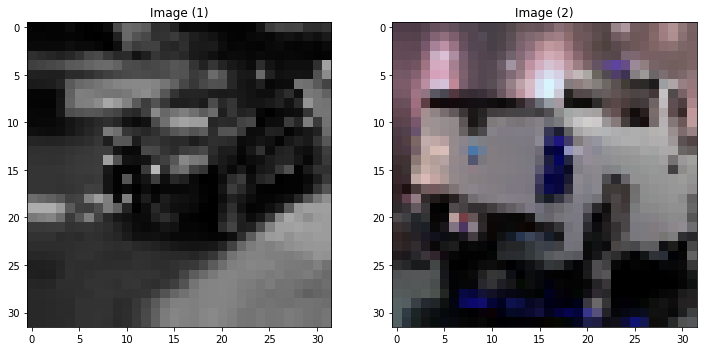



====================Prices==========================
[[786310]
 [   704]]


====================Labels==========================
[1 0]




====================Images==========================
52/85 [=================>............] - ETA: 13s - loss: 8.2140 - acc: 0.4904

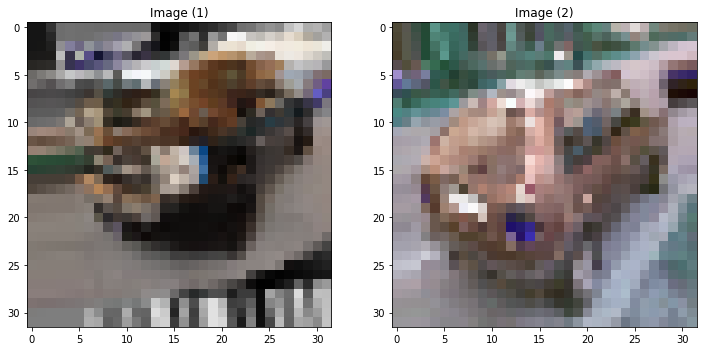



====================Prices==========================
[[6954]
 [9398]]


====================Labels==========================
[0 0]




====================Images==========================
53/85 [=================>............] - ETA: 13s - loss: 8.0591 - acc: 0.5000

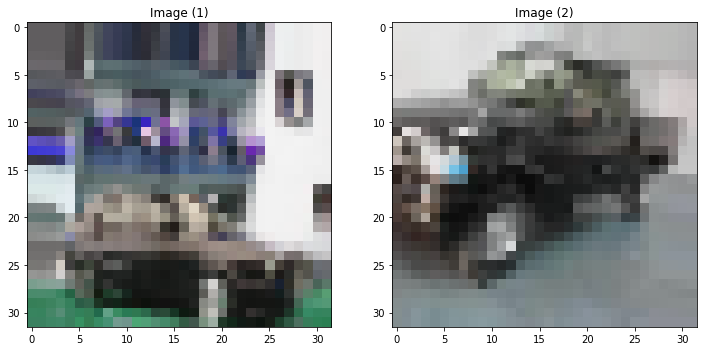



====================Prices==========================
[[1908]
 [5891]]


====================Labels==========================
[0 0]




====================Images==========================
54/85 [==================>...........] - ETA: 12s - loss: 7.9098 - acc: 0.5093

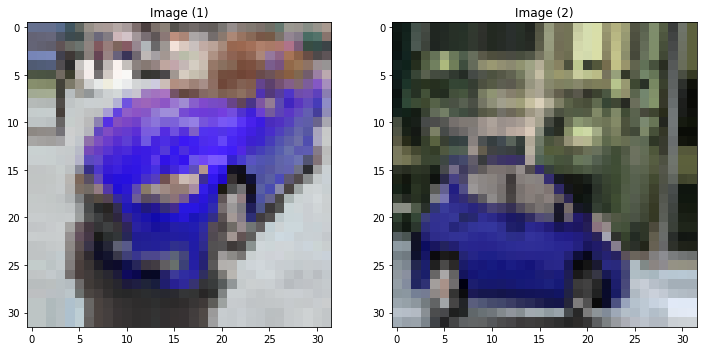



====================Prices==========================
[[6878]
 [2011]]


====================Labels==========================
[0 0]




====================Images==========================
55/85 [==================>...........] - ETA: 12s - loss: 7.7660 - acc: 0.5182

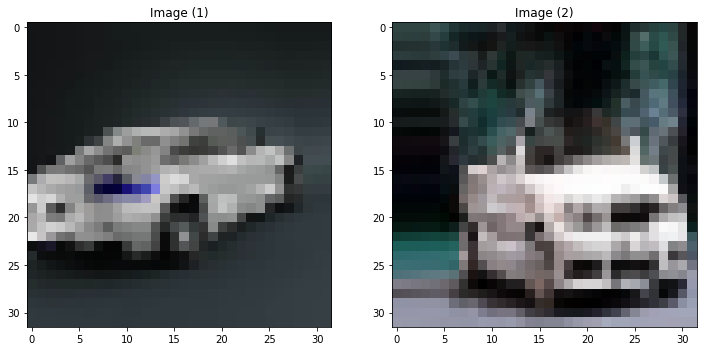



====================Prices==========================
[[960027]
 [  2718]]


====================Labels==========================
[1 0]




====================Images==========================
56/85 [==================>...........] - ETA: 11s - loss: 7.7712 - acc: 0.5179

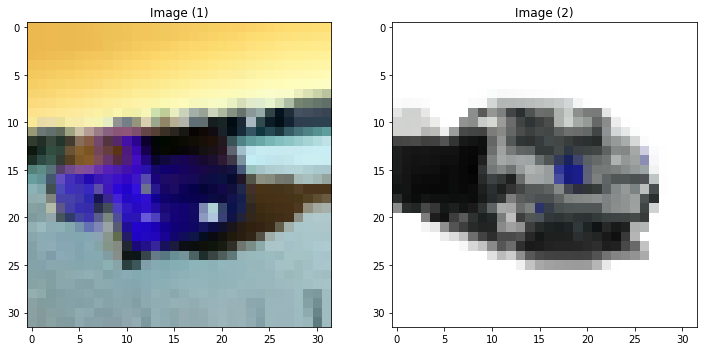



====================Prices==========================
[[872910]
 [993717]]


====================Labels==========================
[1 1]




====================Images==========================
57/85 [===================>..........] - ETA: 11s - loss: 7.9177 - acc: 0.5088

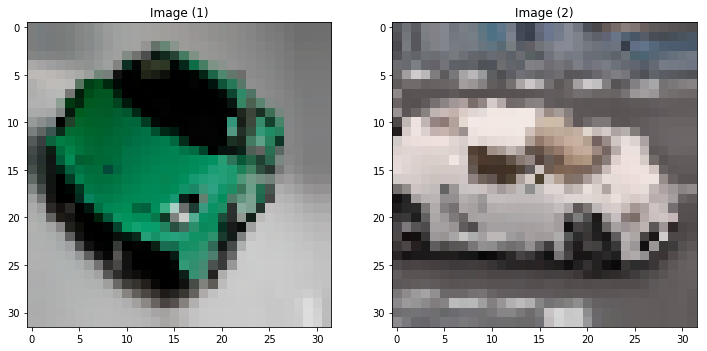



====================Prices==========================
[[ 69730]
 [642855]]


====================Labels==========================
[1 1]




====================Images==========================
58/85 [===================>..........] - ETA: 11s - loss: 8.0591 - acc: 0.5000

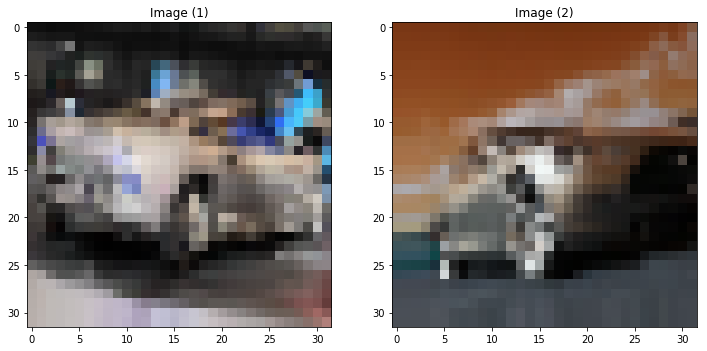



====================Prices==========================
[[966594]
 [524288]]


====================Labels==========================
[1 1]




====================Images==========================
59/85 [===================>..........] - ETA: 10s - loss: 8.1957 - acc: 0.4915

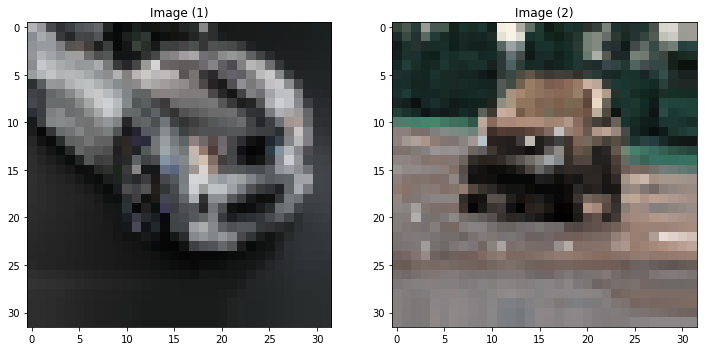



====================Prices==========================
[[507711]
 [  9031]]


====================Labels==========================
[1 0]
60/85 [====================>.........] - ETA: 10s - loss: 8.1934 - acc: 0.4917



====================Images==========================


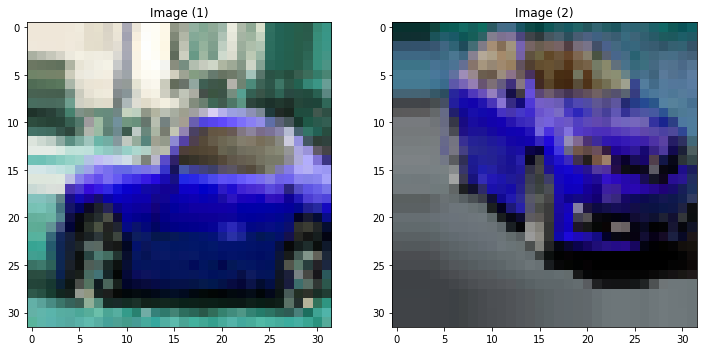



====================Prices==========================
[[741001]
 [  5782]]


====================Labels==========================
[1 0]




====================Images==========================
61/85 [====================>.........] - ETA: 9s - loss: 8.1912 - acc: 0.4918 

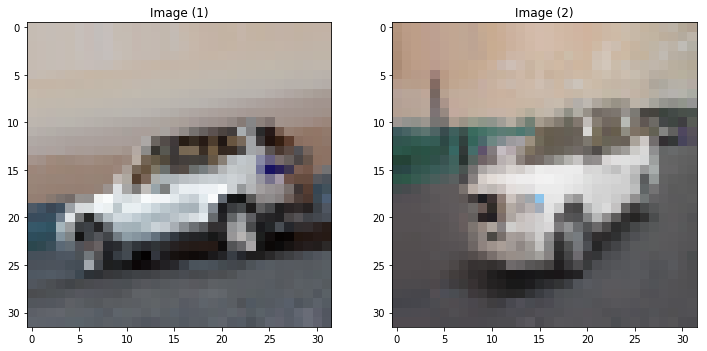



====================Prices==========================
[[5587]
 [ 237]]


====================Labels==========================
[0 0]




====================Images==========================
62/85 [====================>.........] - ETA: 9s - loss: 8.0591 - acc: 0.5000

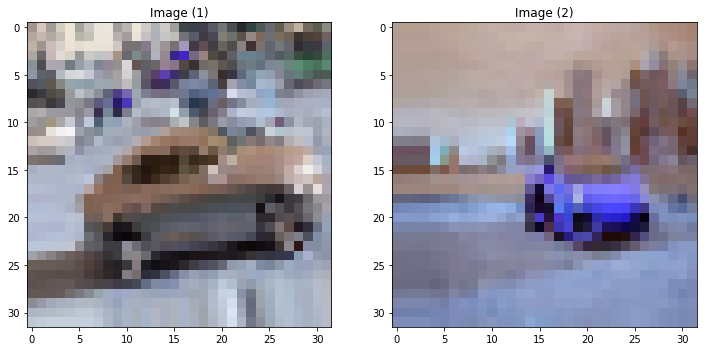



====================Prices==========================
[[943813]
 [394073]]


====================Labels==========================
[1 1]




====================Images==========================
63/85 [=====================>........] - ETA: 9s - loss: 8.1870 - acc: 0.4921

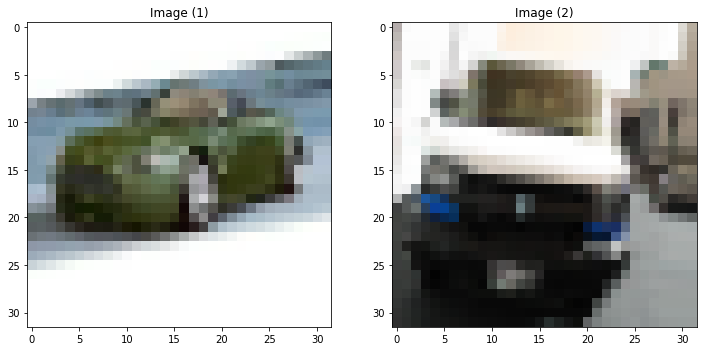



====================Prices==========================
[[674061]
 [  2234]]


====================Labels==========================
[1 0]




====================Images==========================
64/85 [=====================>........] - ETA: 8s - loss: 8.1850 - acc: 0.4922

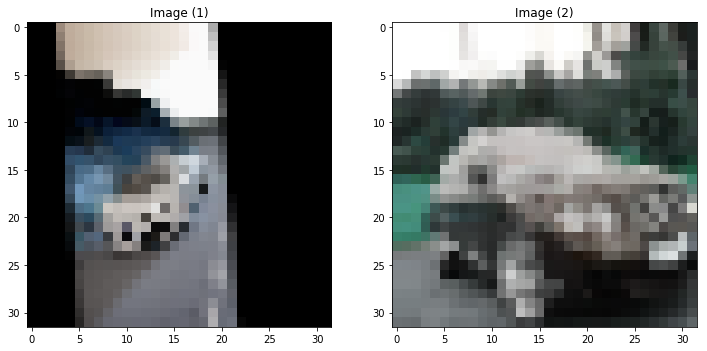



====================Prices==========================
[[710370]
 [797401]]


====================Labels==========================
[1 1]




====================Images==========================
65/85 [=====================>........] - ETA: 8s - loss: 8.3070 - acc: 0.4846

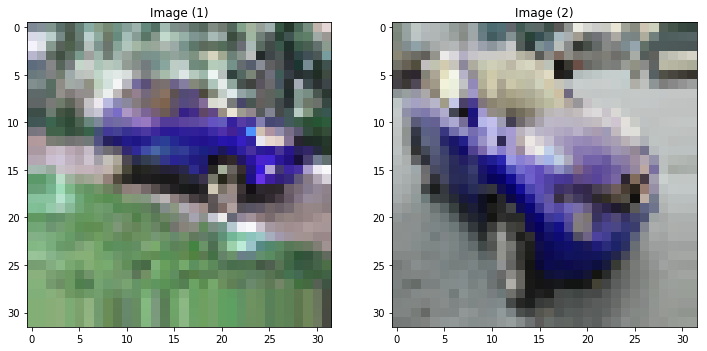



====================Prices==========================
[[3641]
 [8186]]


====================Labels==========================
[0 0]




====================Images==========================
66/85 [======================>.......] - ETA: 7s - loss: 8.1812 - acc: 0.4924

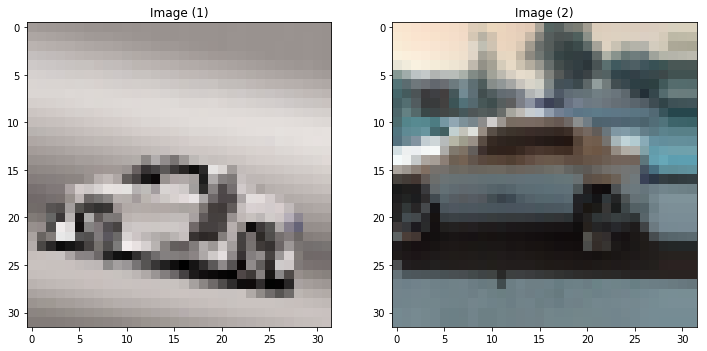



====================Prices==========================
[[962666]
 [  1547]]


====================Labels==========================
[1 0]




====================Images==========================
67/85 [======================>.......] - ETA: 7s - loss: 8.1793 - acc: 0.4925

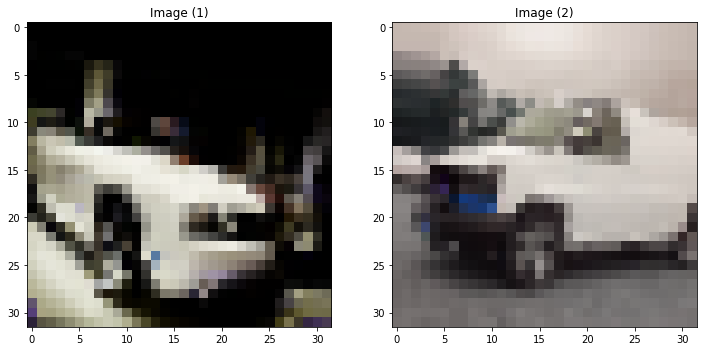



====================Prices==========================
[[267727]
 [  2909]]


====================Labels==========================
[1 0]




====================Images==========================
68/85 [=======================>......] - ETA: 6s - loss: 8.1776 - acc: 0.4926

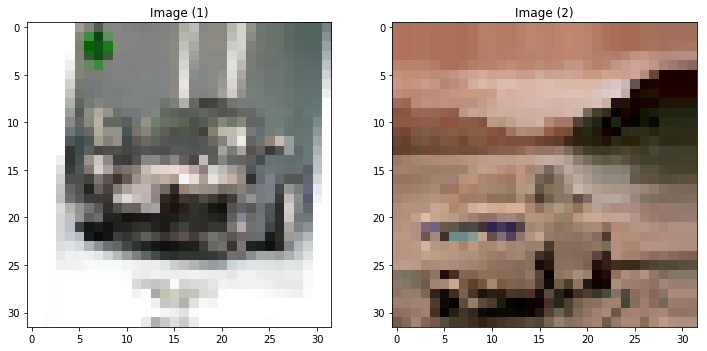



====================Prices==========================
[[874565]
 [  1523]]


====================Labels==========================
[1 0]
69/85 [=======================>......] - ETA: 6s - loss: 8.1759 - acc: 0.4928



====================Images==========================


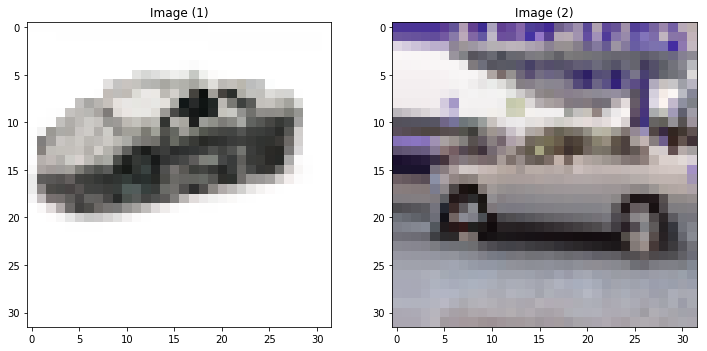



====================Prices==========================
[[857427]
 [   196]]


====================Labels==========================
[1 0]




====================Images==========================
70/85 [=======================>......] - ETA: 6s - loss: 8.1742 - acc: 0.4929

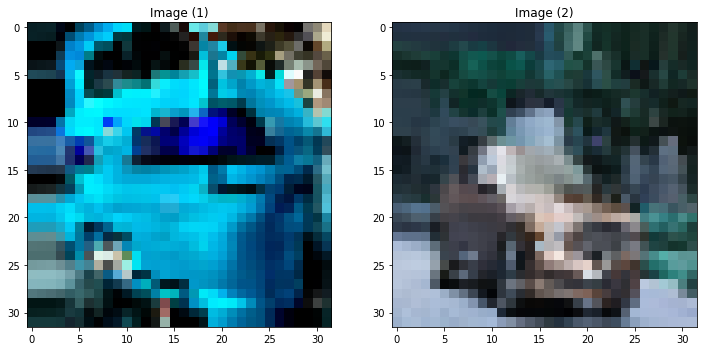



====================Prices==========================
[[7285]
 [9192]]


====================Labels==========================
[0 0]




====================Images==========================
71/85 [========================>.....] - ETA: 5s - loss: 8.0591 - acc: 0.5000

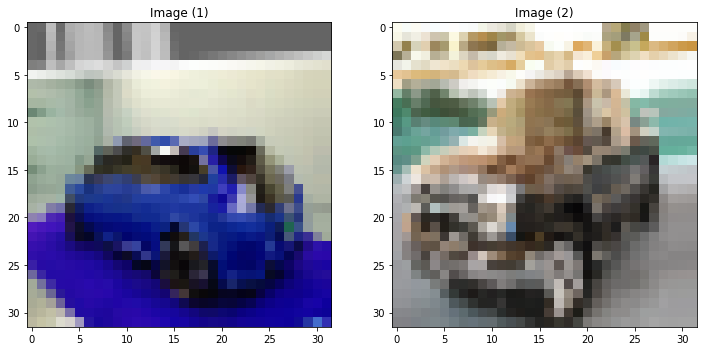



====================Prices==========================
[[4609]
 [2597]]


====================Labels==========================
[0 0]




====================Images==========================
72/85 [========================>.....] - ETA: 5s - loss: 7.9471 - acc: 0.5069

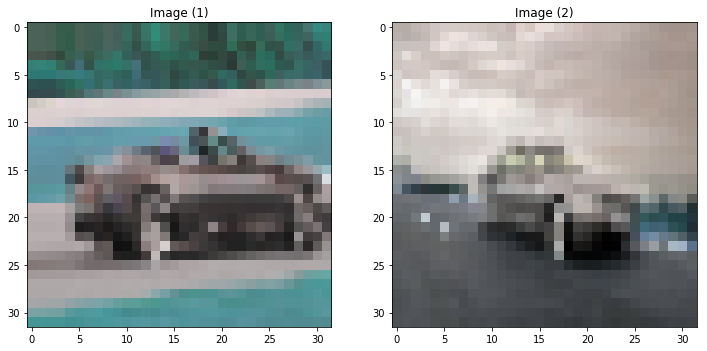



====================Prices==========================
[[195764]
 [752437]]


====================Labels==========================
[1 1]




====================Images==========================
73/85 [========================>.....] - ETA: 4s - loss: 8.0591 - acc: 0.5000

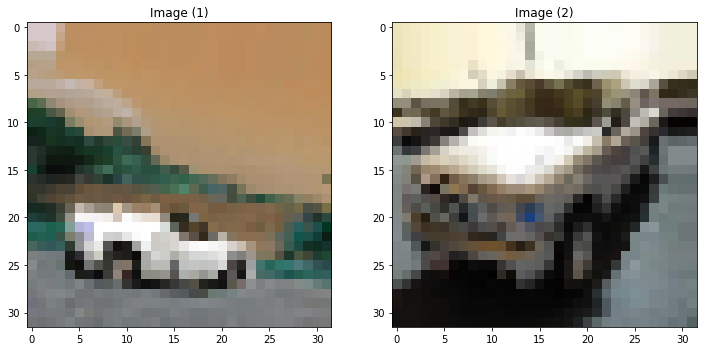



====================Prices==========================
[[872116]
 [   703]]


====================Labels==========================
[1 0]




====================Images==========================
74/85 [=========================>....] - ETA: 4s - loss: 8.0591 - acc: 0.5000

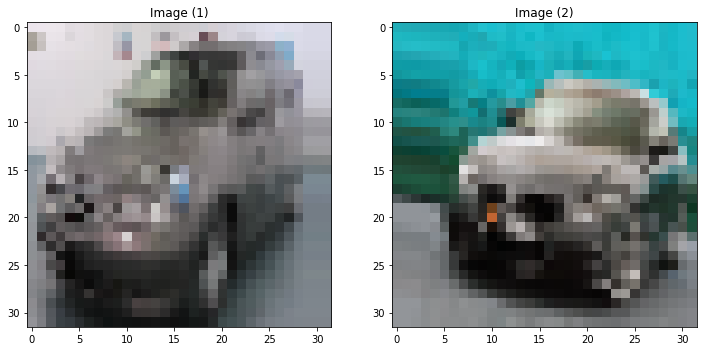



====================Prices==========================
[[  8651]
 [754890]]


====================Labels==========================
[0 1]




====================Images==========================
75/85 [=========================>....] - ETA: 4s - loss: 8.0591 - acc: 0.5000

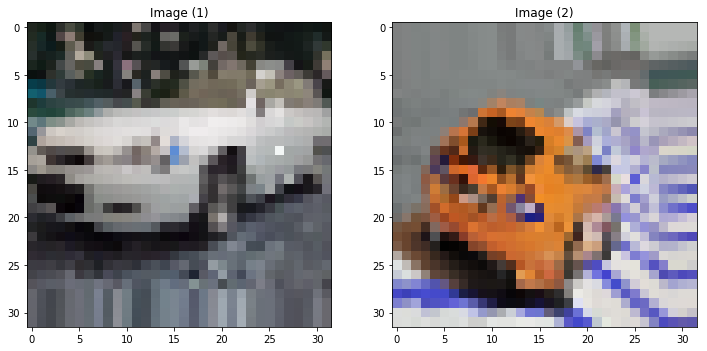



====================Prices==========================
[[  9004]
 [501141]]


====================Labels==========================
[0 1]




====================Images==========================
76/85 [=========================>....] - ETA: 3s - loss: 8.0591 - acc: 0.5000

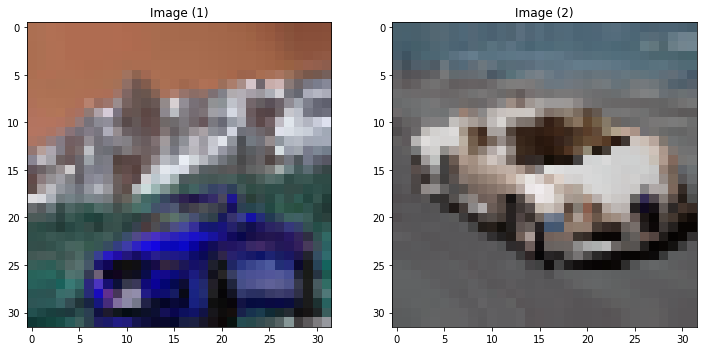



====================Prices==========================
[[ 62004]
 [667923]]


====================Labels==========================
[1 1]




====================Images==========================
77/85 [==========================>...] - ETA: 3s - loss: 8.1637 - acc: 0.4935

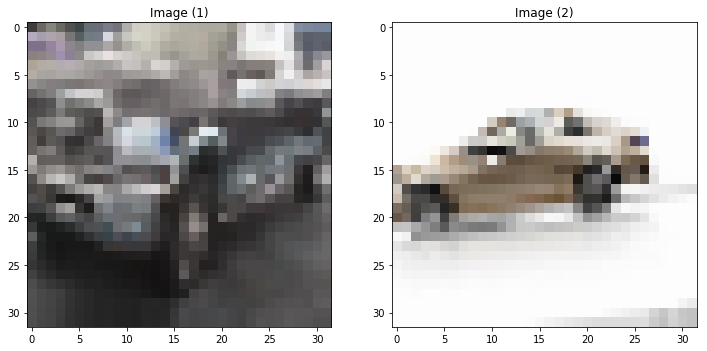



====================Prices==========================
[[2378]
 [3365]]


====================Labels==========================
[0 0]




====================Images==========================
78/85 [==========================>...] - ETA: 2s - loss: 8.0591 - acc: 0.5000

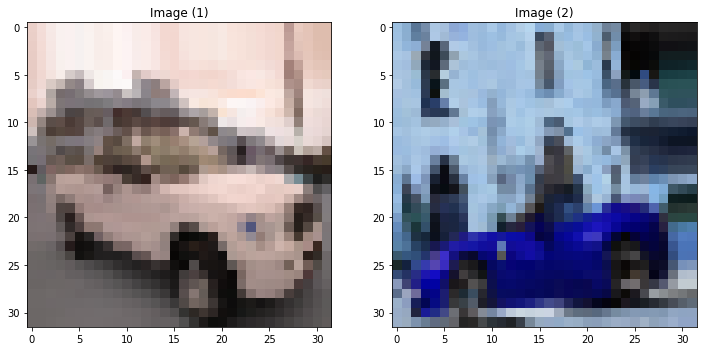



====================Prices==========================
[[  9250]
 [475990]]


====================Labels==========================
[0 1]




====================Images==========================
79/85 [==========================>...] - ETA: 2s - loss: 8.0591 - acc: 0.5000

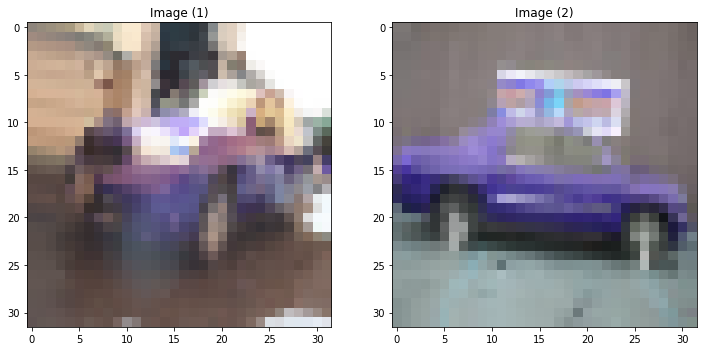



====================Prices==========================
[[ 597]
 [5383]]


====================Labels==========================
[0 0]




====================Images==========================
80/85 [===========================>..] - ETA: 2s - loss: 7.9583 - acc: 0.5062

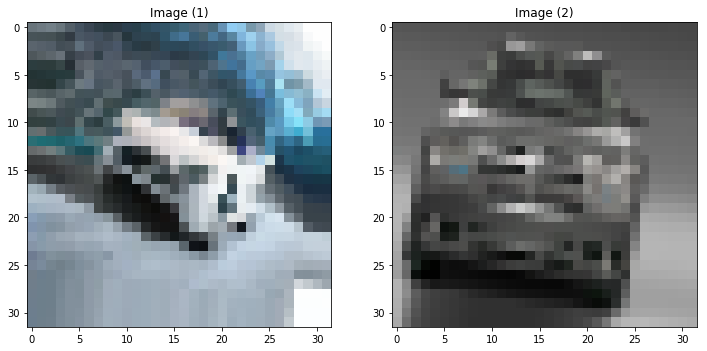



====================Prices==========================
[[147980]
 [  5568]]


====================Labels==========================
[1 0]




====================Images==========================
81/85 [===========================>..] - ETA: 1s - loss: 7.9596 - acc: 0.5062

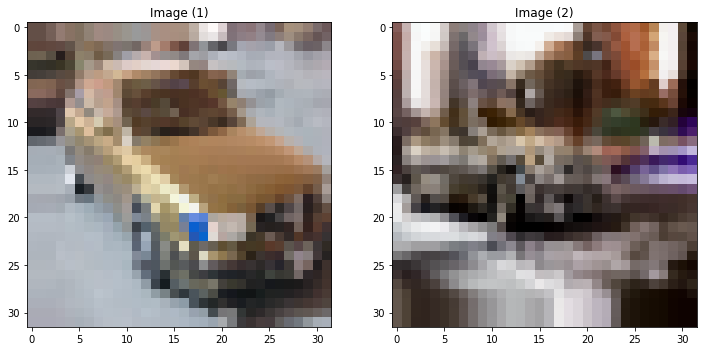



====================Prices==========================
[[  2943]
 [594042]]


====================Labels==========================
[0 1]




====================Images==========================
82/85 [===========================>..] - ETA: 1s - loss: 7.9608 - acc: 0.5061

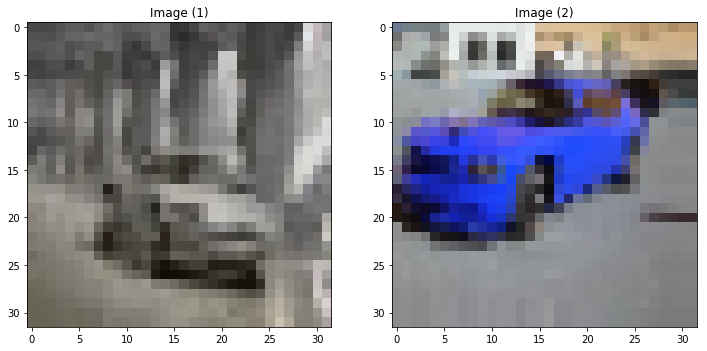



====================Prices==========================
[[864541]
 [201615]]


====================Labels==========================
[1 1]




====================Images==========================
83/85 [============================>.] - ETA: 0s - loss: 8.0591 - acc: 0.5000

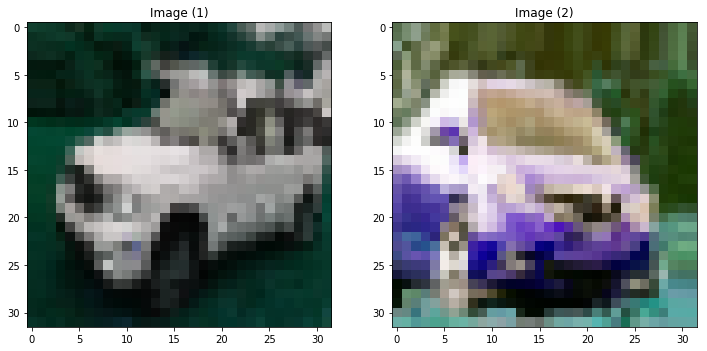



====================Prices==========================
[[2577]
 [1768]]


====================Labels==========================
[0 0]




====================Images==========================
84/85 [============================>.] - ETA: 0s - loss: 7.9631 - acc: 0.5060

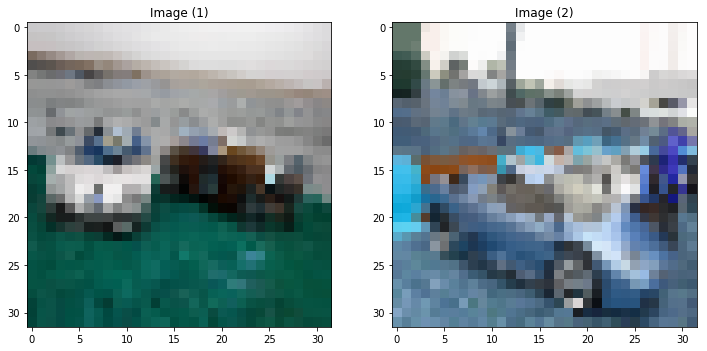



====================Prices==========================
[[120610]
 [898129]]


====================Labels==========================
[1 1]




====================Images==========================


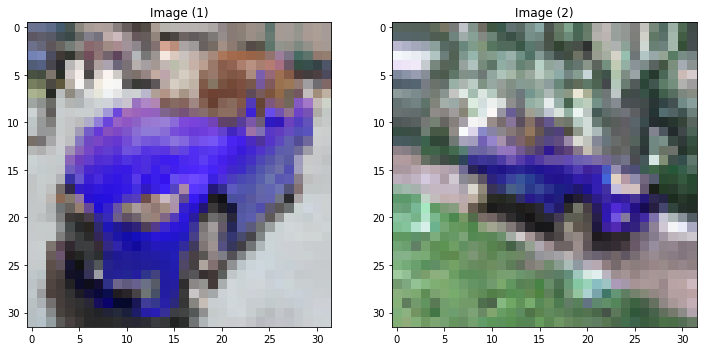



====================Prices==========================
[[6878]
 [3641]]


====================Labels==========================
[0 0]




====================Images==========================
85/85 [==============================] - 35s 410ms/step - loss: 8.0591 - acc: 0.5000 - val_loss: 7.8524 - val_acc: 0.5128
Epoch 2/2
 1/85 [..............................] - ETA: 0s - loss: 1.0000e-07 - acc: 1.0000

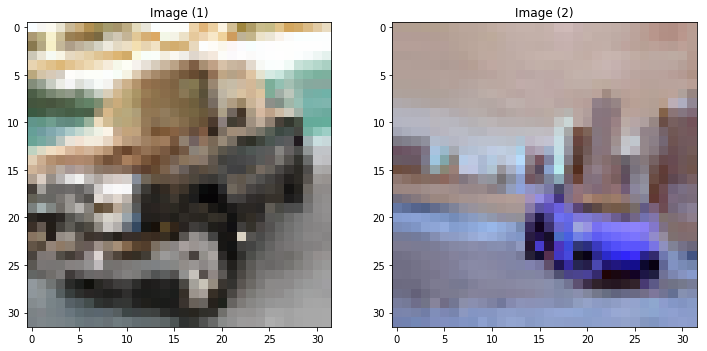



====================Prices==========================
[[  2597]
 [394073]]


====================Labels==========================
[0 1]




====================Images==========================
 2/85 [..............................] - ETA: 14s - loss: 4.0295 - acc: 0.7500   

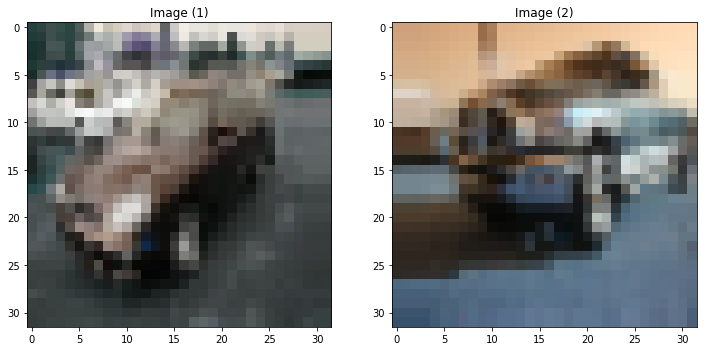



====================Prices==========================
[[4465]
 [5371]]


====================Labels==========================
[0 0]




====================Images==========================
 3/85 [>.............................] - ETA: 20s - loss: 2.6863 - acc: 0.8333

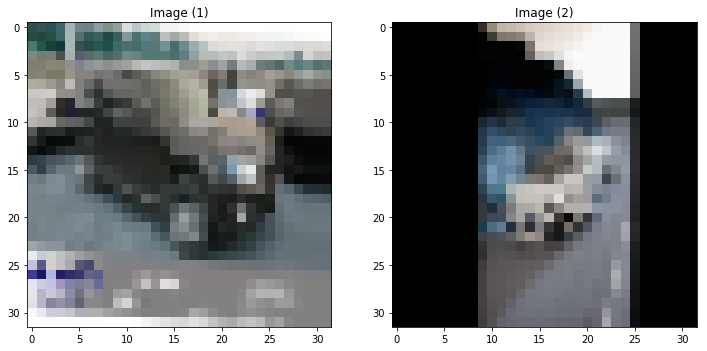



====================Prices==========================
[[  1077]
 [710370]]


====================Labels==========================
[0 1]




====================Images==========================
 4/85 [>.............................] - ETA: 23s - loss: 4.0295 - acc: 0.7500

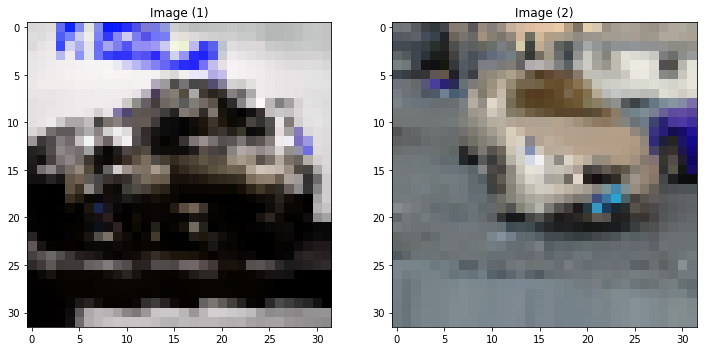



====================Prices==========================
[[437339]
 [  7565]]


====================Labels==========================
[1 0]




====================Images==========================
 5/85 [>.............................] - ETA: 24s - loss: 4.8354 - acc: 0.7000

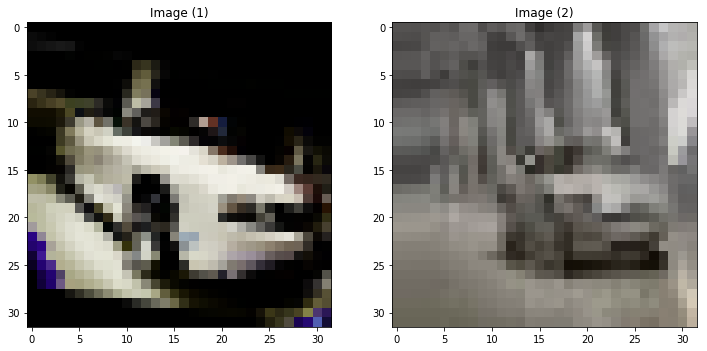



====================Prices==========================
[[267727]
 [864541]]


====================Labels==========================
[1 1]




====================Images==========================
 6/85 [=>............................] - ETA: 25s - loss: 6.7159 - acc: 0.5833

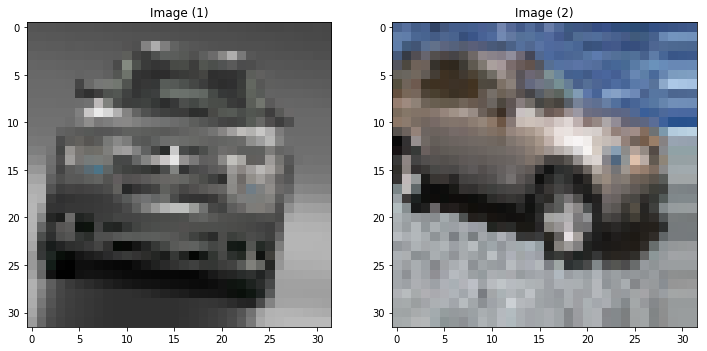



====================Prices==========================
[[5568]
 [9454]]


====================Labels==========================
[0 0]




====================Images==========================
 7/85 [=>............................] - ETA: 25s - loss: 5.7565 - acc: 0.6429

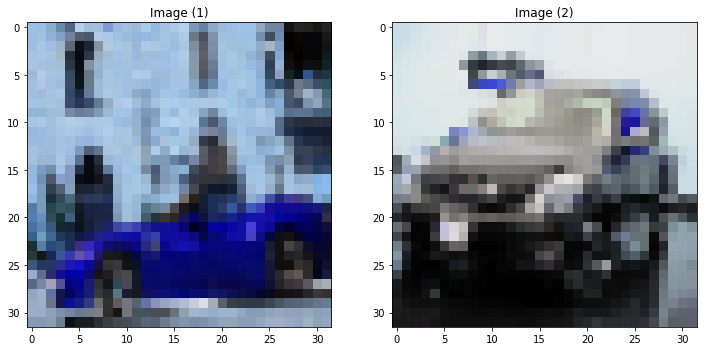



====================Prices==========================
[[475990]
 [  2358]]


====================Labels==========================
[1 0]




====================Images==========================
 8/85 [=>............................] - ETA: 25s - loss: 6.0443 - acc: 0.6250

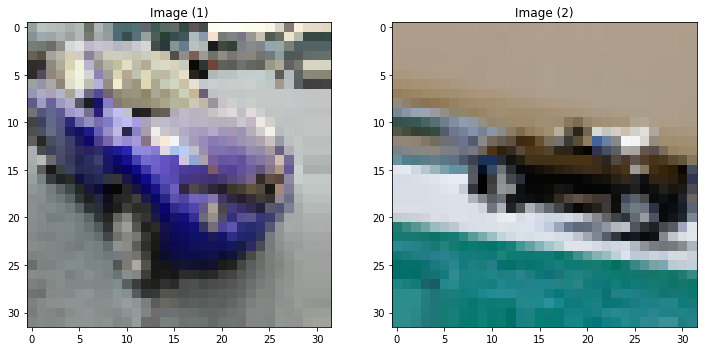



====================Prices==========================
[[  8186]
 [139177]]


====================Labels==========================
[0 1]




====================Images==========================
 9/85 [==>...........................] - ETA: 25s - loss: 6.2681 - acc: 0.6111

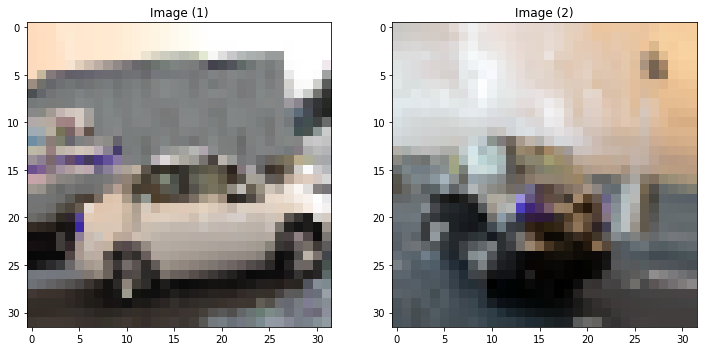



====================Prices==========================
[[  8486]
 [488051]]


====================Labels==========================
[0 1]




====================Images==========================
10/85 [==>...........................] - ETA: 26s - loss: 6.4472 - acc: 0.6000

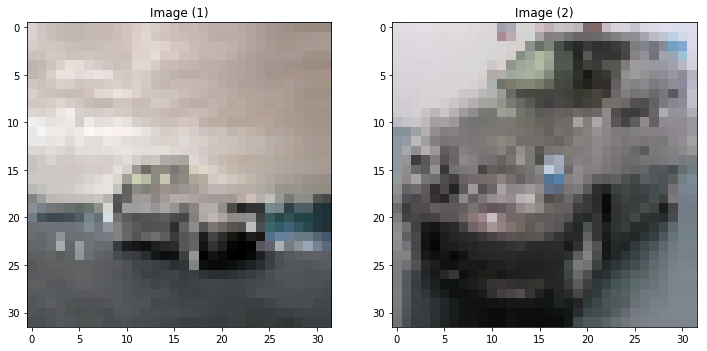



====================Prices==========================
[[752437]
 [  8651]]


====================Labels==========================
[1 0]




====================Images==========================
11/85 [==>...........................] - ETA: 26s - loss: 6.5938 - acc: 0.5909

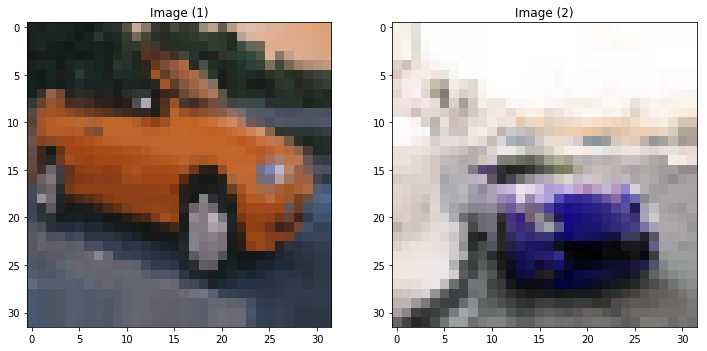



====================Prices==========================
[[  4347]
 [811858]]


====================Labels==========================
[0 1]




====================Images==========================
12/85 [===>..........................] - ETA: 25s - loss: 6.7159 - acc: 0.5833

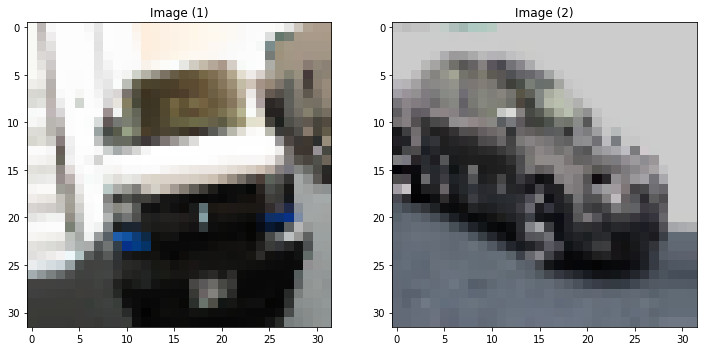



====================Prices==========================
[[2234]
 [8831]]


====================Labels==========================
[0 0]




====================Images==========================
13/85 [===>..........................] - ETA: 25s - loss: 6.1993 - acc: 0.6154

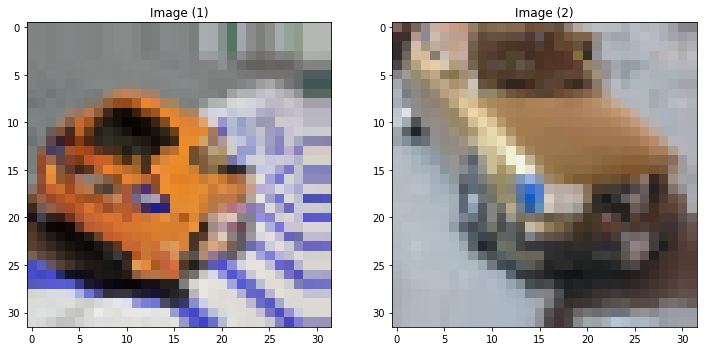



====================Prices==========================
[[501141]
 [  2943]]


====================Labels==========================
[1 0]




====================Images==========================
14/85 [===>..........................] - ETA: 25s - loss: 6.3321 - acc: 0.6071

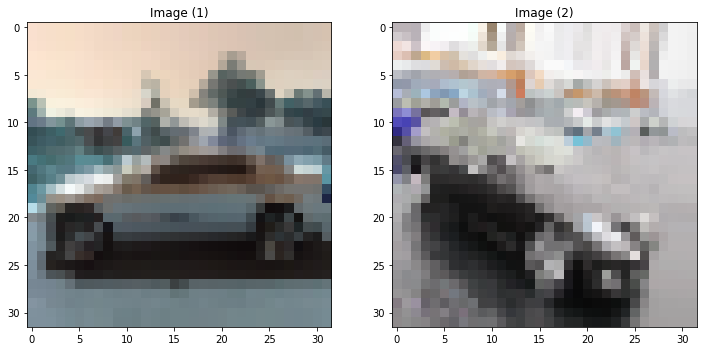



====================Prices==========================
[[1547]
 [6798]]


====================Labels==========================
[0 0]




====================Images==========================
15/85 [====>.........................] - ETA: 25s - loss: 5.9100 - acc: 0.6333

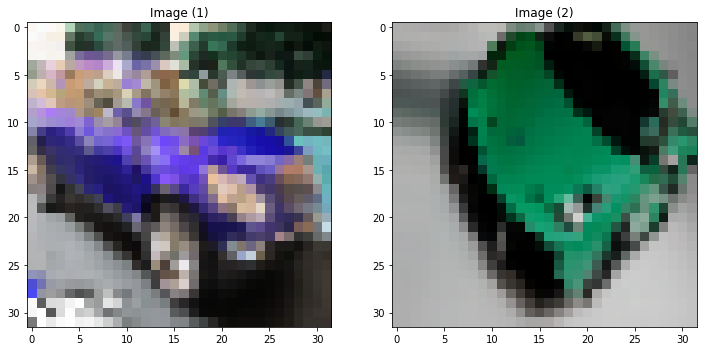



====================Prices==========================
[[ 3942]
 [69730]]


====================Labels==========================
[0 1]




====================Images==========================
16/85 [====>.........................] - ETA: 25s - loss: 6.0443 - acc: 0.6250

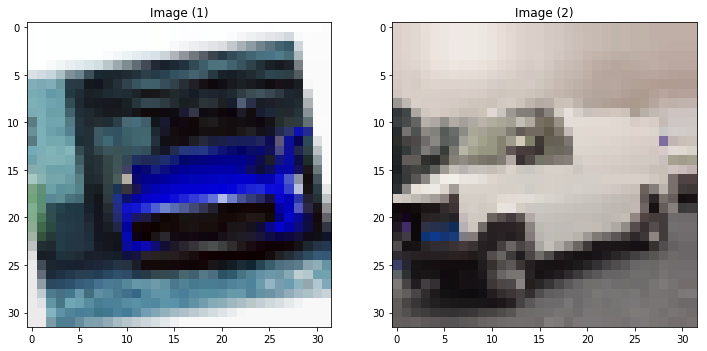



====================Prices==========================
[[242291]
 [  2909]]


====================Labels==========================
[1 0]




====================Images==========================
17/85 [=====>........................] - ETA: 24s - loss: 6.1628 - acc: 0.6176

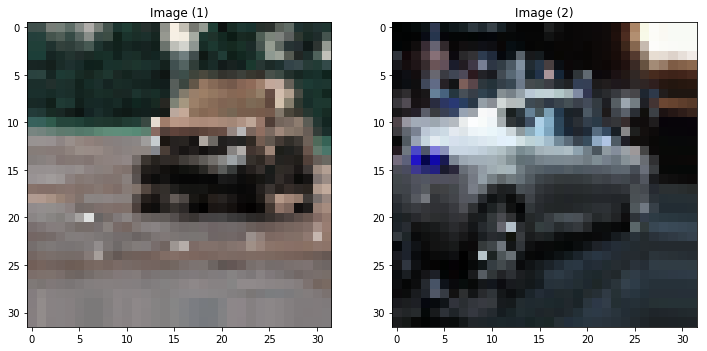



====================Prices==========================
[[ 9031]
 [20197]]


====================Labels==========================
[0 1]




====================Images==========================
18/85 [=====>........................] - ETA: 24s - loss: 6.2681 - acc: 0.6111

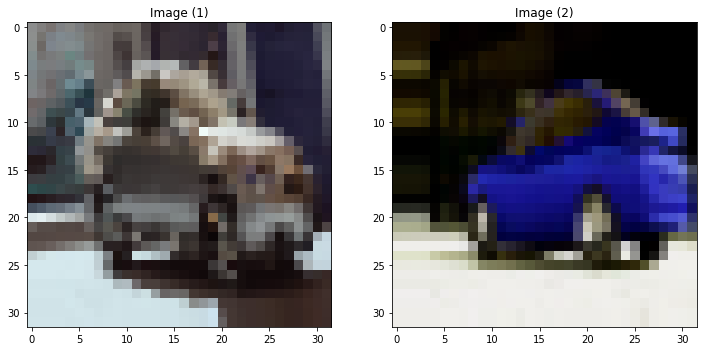



====================Prices==========================
[[5591]
 [6663]]


====================Labels==========================
[0 0]




====================Images==========================
19/85 [=====>........................] - ETA: 24s - loss: 5.9382 - acc: 0.6316

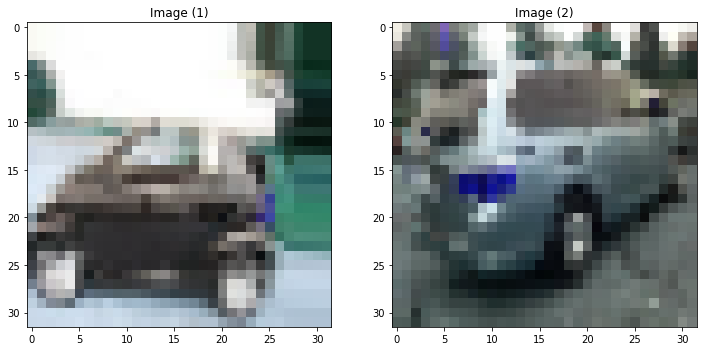



====================Prices==========================
[[3800]
 [6631]]


====================Labels==========================
[0 0]




====================Images==========================
20/85 [======>.......................] - ETA: 24s - loss: 5.6413 - acc: 0.6500

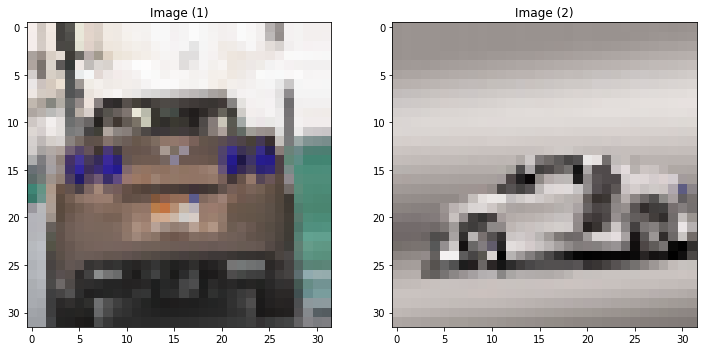



====================Prices==========================
[[944072]
 [962666]]


====================Labels==========================
[1 1]




====================Images==========================
21/85 [======>.......................] - ETA: 23s - loss: 6.1402 - acc: 0.6190

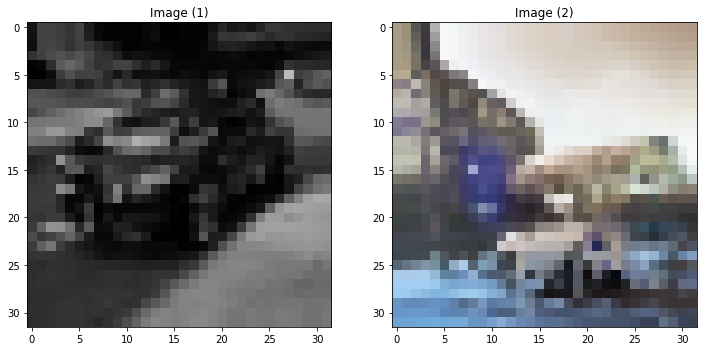



====================Prices==========================
[[786310]
 [  6230]]


====================Labels==========================
[1 0]




====================Images==========================
22/85 [======>.......................] - ETA: 23s - loss: 6.2274 - acc: 0.6136

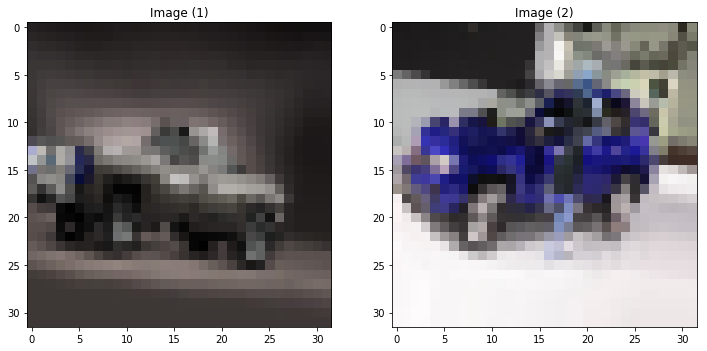



====================Prices==========================
[[1596]
 [2567]]


====================Labels==========================
[0 0]




====================Images==========================
23/85 [=======>......................] - ETA: 23s - loss: 5.9567 - acc: 0.6304

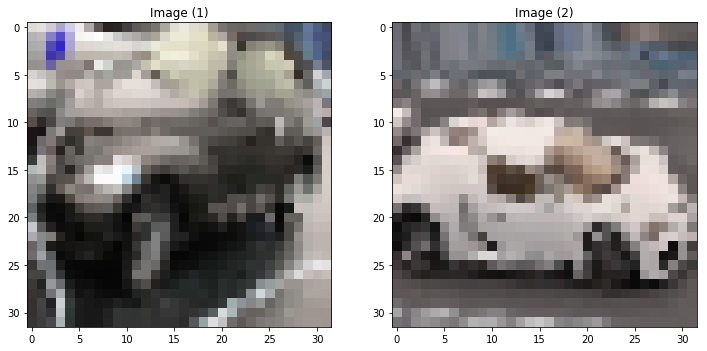



====================Prices==========================
[[  2987]
 [642855]]


====================Labels==========================
[0 1]




====================Images==========================
24/85 [=======>......................] - ETA: 23s - loss: 6.0443 - acc: 0.6250

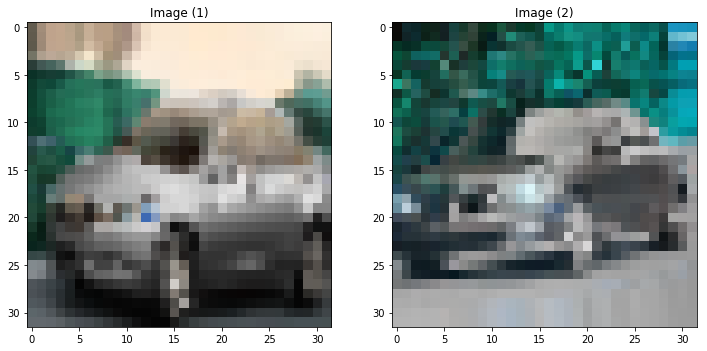



====================Prices==========================
[[  2866]
 [924721]]


====================Labels==========================
[0 1]




====================Images==========================
25/85 [=======>......................] - ETA: 22s - loss: 6.1249 - acc: 0.6200

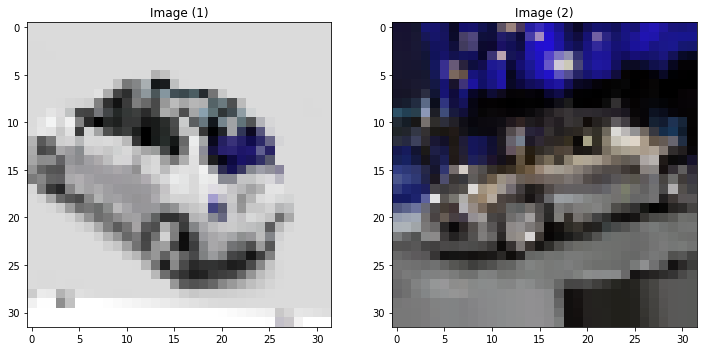



====================Prices==========================
[[  2859]
 [982190]]


====================Labels==========================
[0 1]
26/85 [========>.....................] - ETA: 22s - loss: 6.1993 - acc: 0.6154



====================Images==========================


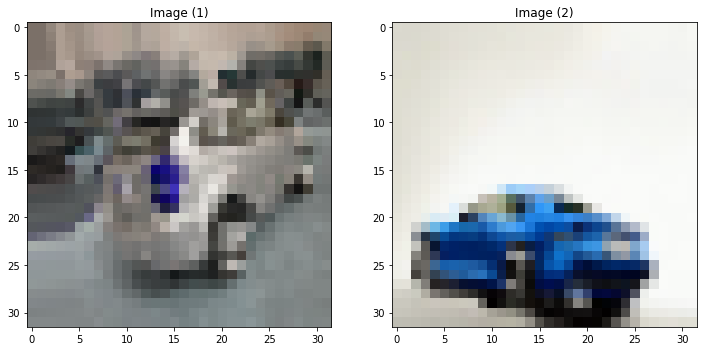



====================Prices==========================
[[  9468]
 [990521]]


====================Labels==========================
[0 1]




====================Images==========================
27/85 [========>.....................] - ETA: 22s - loss: 6.2681 - acc: 0.6111

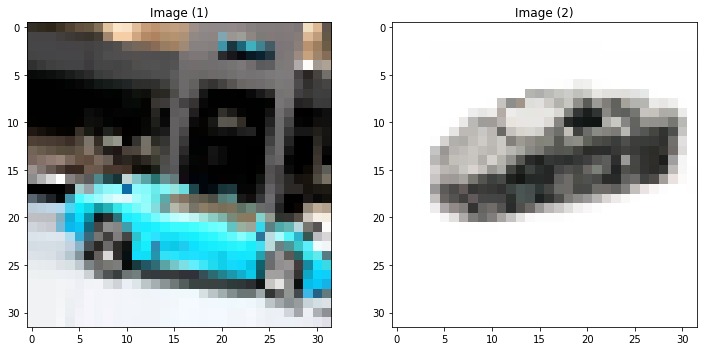



====================Prices==========================
[[943462]
 [857427]]


====================Labels==========================
[1 1]




====================Images==========================
28/85 [========>.....................] - ETA: 21s - loss: 6.6199 - acc: 0.5893

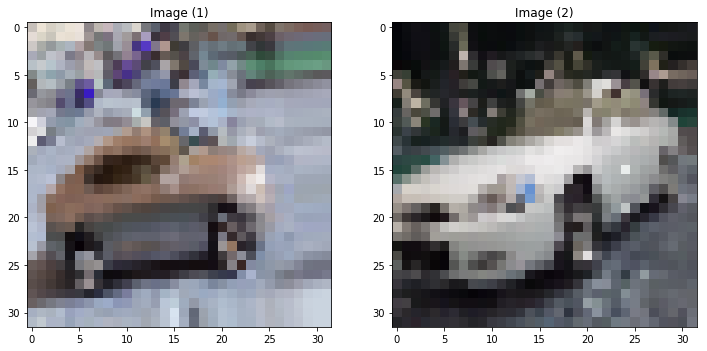



====================Prices==========================
[[943813]
 [  9004]]


====================Labels==========================
[1 0]




====================Images==========================
29/85 [=========>....................] - ETA: 21s - loss: 6.6696 - acc: 0.5862

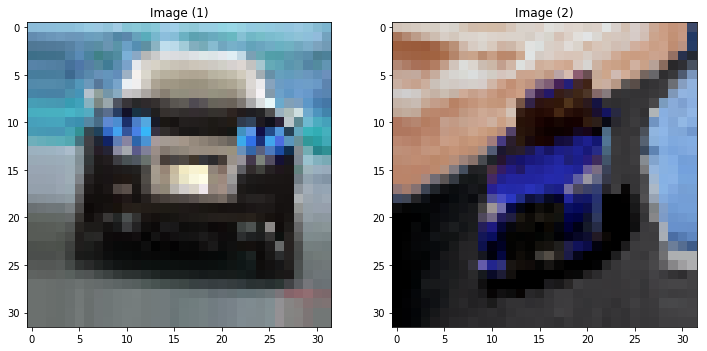



====================Prices==========================
[[255762]
 [  2430]]


====================Labels==========================
[1 0]




====================Images==========================
30/85 [=========>....................] - ETA: 21s - loss: 6.7159 - acc: 0.5833

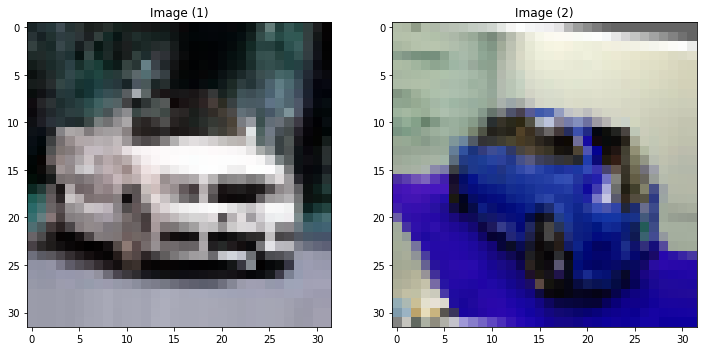



====================Prices==========================
[[2718]
 [4609]]


====================Labels==========================
[0 0]
31/85 [=========>....................] - ETA: 20s - loss: 6.4992 - acc: 0.5968



====================Images==========================


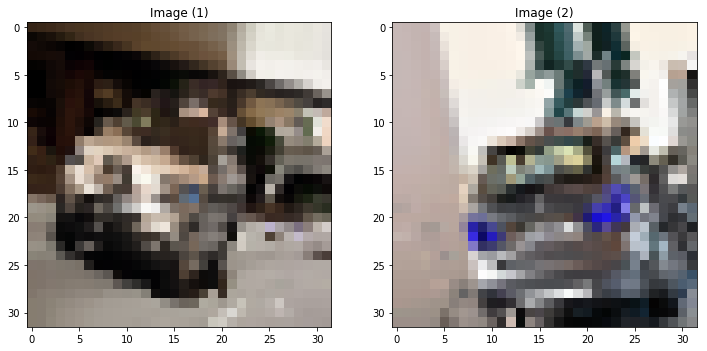



====================Prices==========================
[[7293]
 [9007]]


====================Labels==========================
[0 0]




====================Images==========================
32/85 [==========>...................] - ETA: 20s - loss: 6.2961 - acc: 0.6094

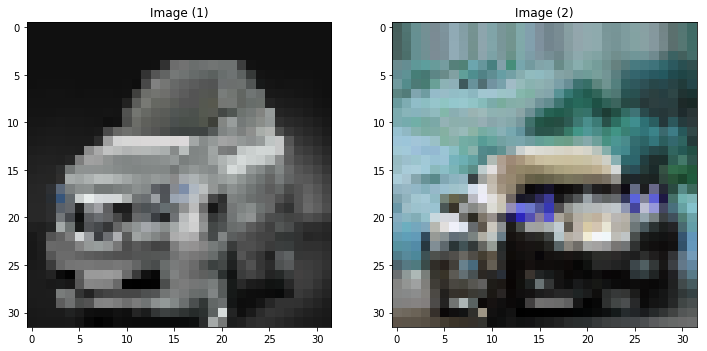



====================Prices==========================
[[    22]
 [808864]]


====================Labels==========================
[0 1]




====================Images==========================
33/85 [==========>...................] - ETA: 20s - loss: 6.3508 - acc: 0.6061

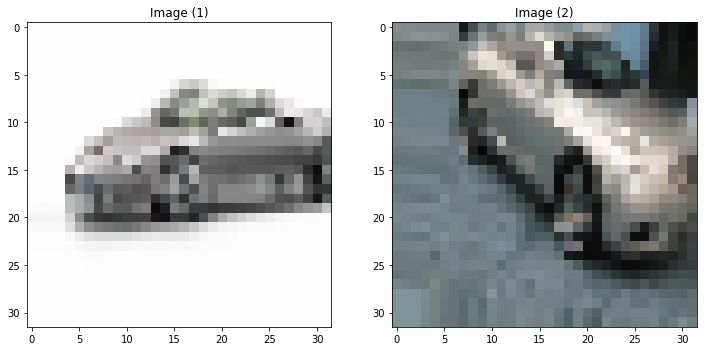



====================Prices==========================
[[435346]
 [687336]]


====================Labels==========================
[1 1]




====================Images==========================
34/85 [===========>..................] - ETA: 19s - loss: 6.6381 - acc: 0.5882

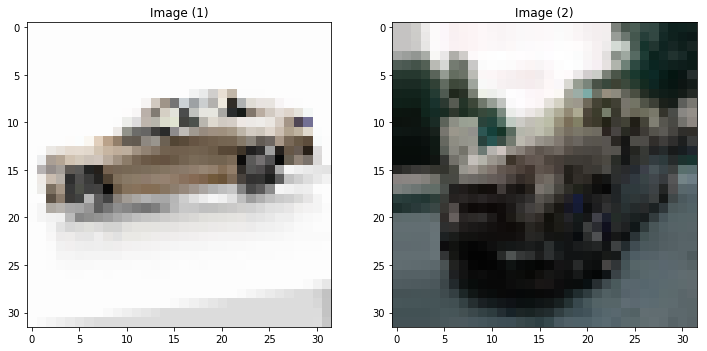



====================Prices==========================
[[  3365]
 [730904]]


====================Labels==========================
[0 1]




====================Images==========================
35/85 [===========>..................] - ETA: 19s - loss: 6.6787 - acc: 0.5857

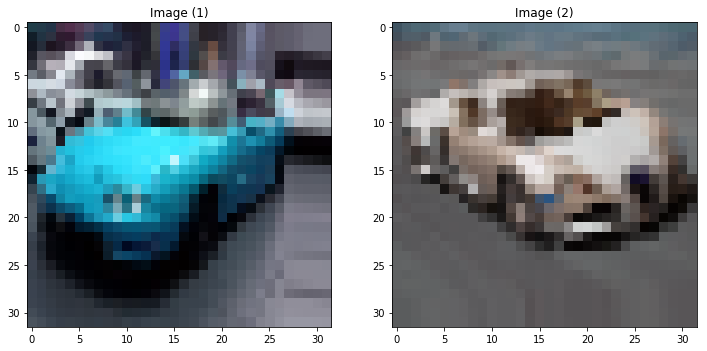



====================Prices==========================
[[   403]
 [667923]]


====================Labels==========================
[0 1]




====================Images==========================
36/85 [===========>..................] - ETA: 18s - loss: 6.7170 - acc: 0.5833

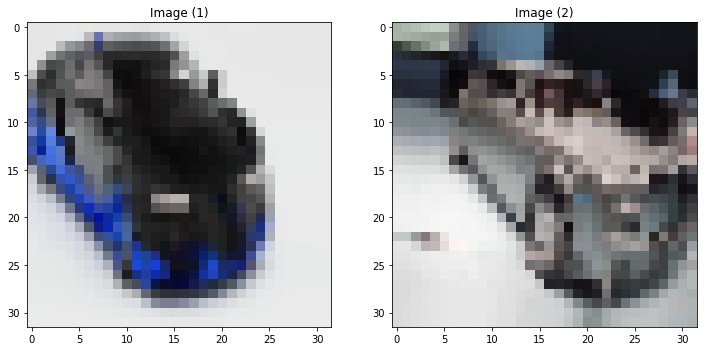



====================Prices==========================
[[412084]
 [515991]]


====================Labels==========================
[1 1]




====================Images==========================
37/85 [============>.................] - ETA: 18s - loss: 6.9711 - acc: 0.5676

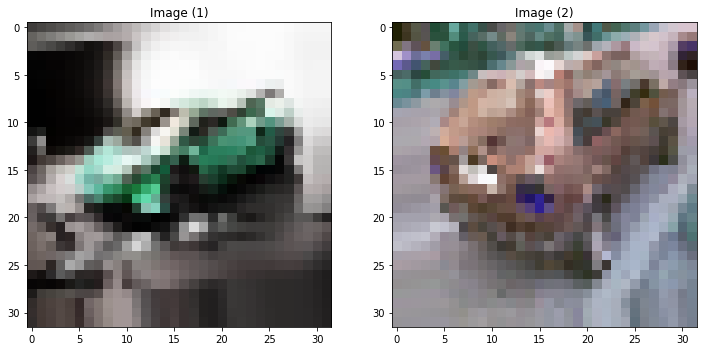



====================Prices==========================
[[210950]
 [  9398]]


====================Labels==========================
[1 0]




====================Images==========================
38/85 [============>.................] - ETA: 18s - loss: 6.9998 - acc: 0.5658

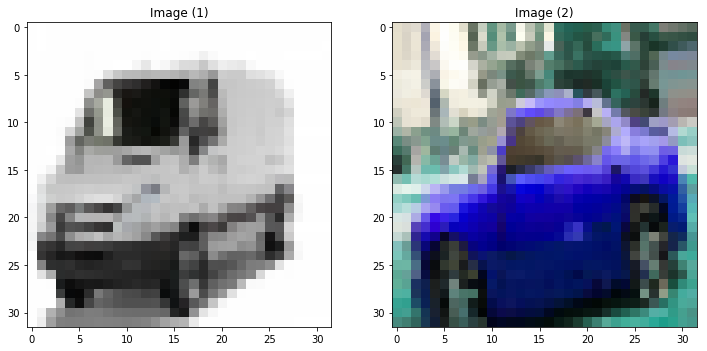



====================Prices==========================
[[  2620]
 [741001]]


====================Labels==========================
[0 1]




====================Images==========================
39/85 [============>.................] - ETA: 17s - loss: 7.0269 - acc: 0.5641

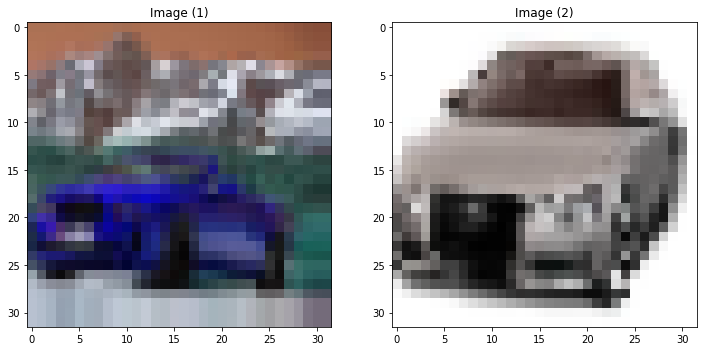



====================Prices==========================
[[ 62004]
 [277451]]


====================Labels==========================
[1 1]




====================Images==========================
40/85 [=============>................] - ETA: 17s - loss: 7.2542 - acc: 0.5500

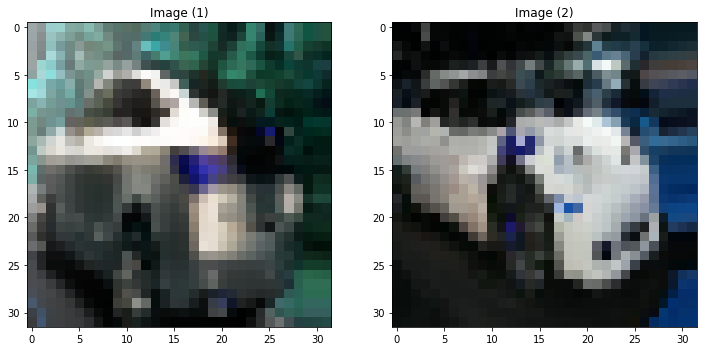



====================Prices==========================
[[552650]
 [318794]]


====================Labels==========================
[1 1]




====================Images==========================
41/85 [=============>................] - ETA: 17s - loss: 7.4704 - acc: 0.5366

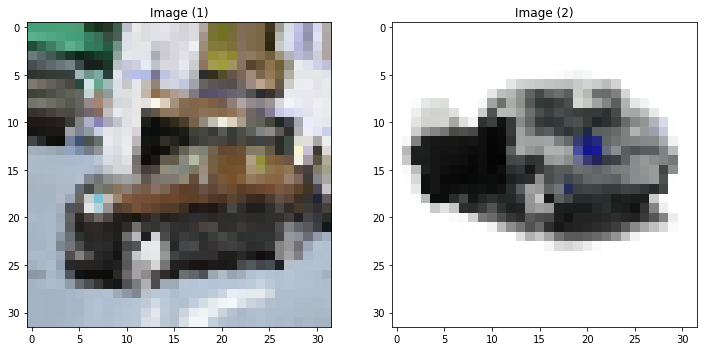



====================Prices==========================
[[  4294]
 [993717]]


====================Labels==========================
[0 1]




====================Images==========================
42/85 [=============>................] - ETA: 16s - loss: 7.4844 - acc: 0.5357

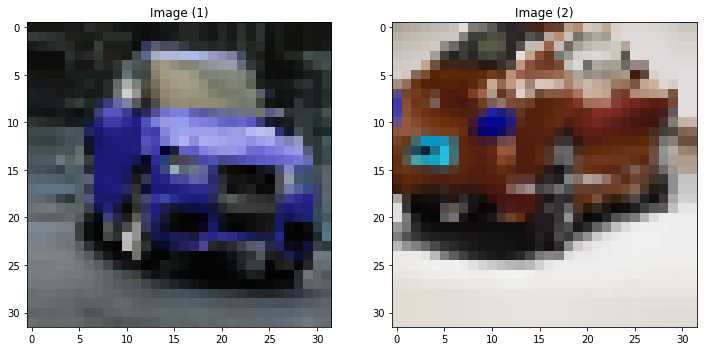



====================Prices==========================
[[131545]
 [330169]]


====================Labels==========================
[1 1]




====================Images==========================
43/85 [==============>...............] - ETA: 16s - loss: 7.6852 - acc: 0.5233

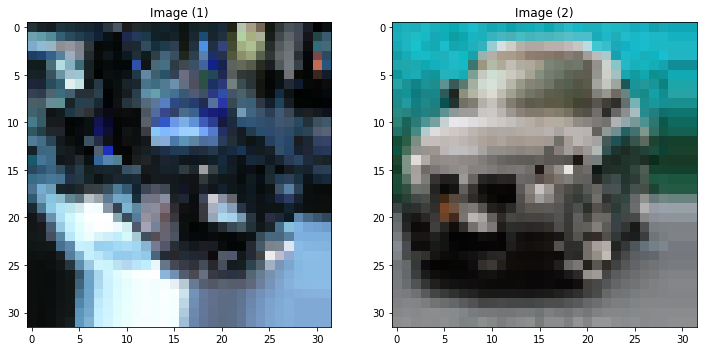



====================Prices==========================
[[643521]
 [754890]]


====================Labels==========================
[1 1]




====================Images==========================
44/85 [==============>...............] - ETA: 15s - loss: 7.8768 - acc: 0.5114

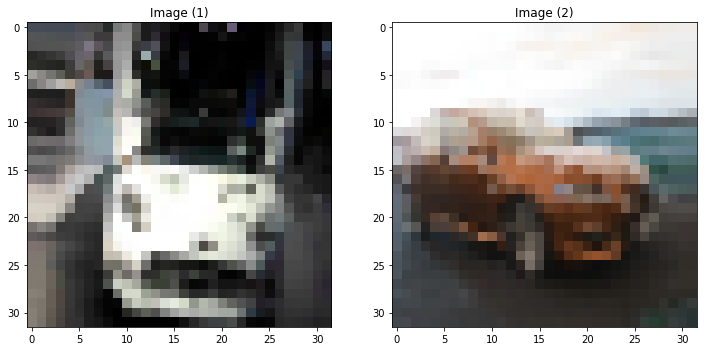



====================Prices==========================
[[311904]
 [  4099]]


====================Labels==========================
[1 0]




====================Images==========================
45/85 [==============>...............] - ETA: 15s - loss: 7.8809 - acc: 0.5111

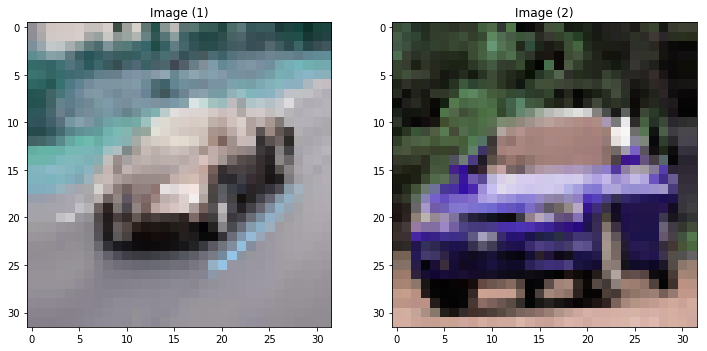



====================Prices==========================
[[940192]
 [  6525]]


====================Labels==========================
[1 0]




====================Images==========================
46/85 [===============>..............] - ETA: 15s - loss: 7.8848 - acc: 0.5109

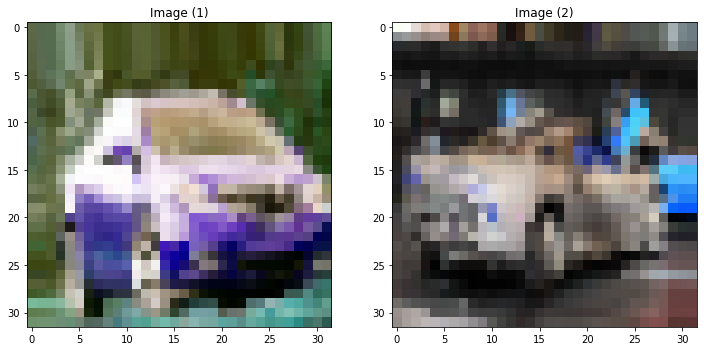



====================Prices==========================
[[  1768]
 [966594]]


====================Labels==========================
[0 1]




====================Images==========================
47/85 [===============>..............] - ETA: 14s - loss: 7.8885 - acc: 0.5106

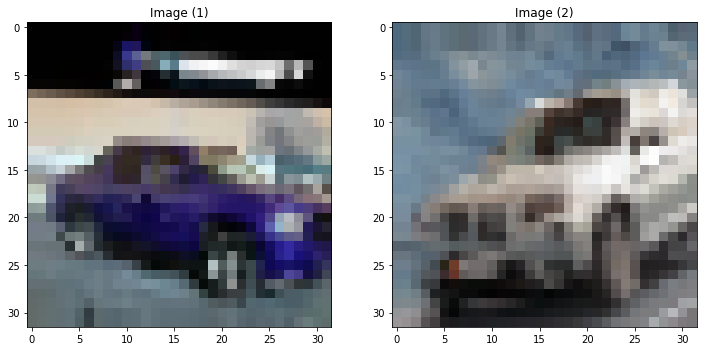



====================Prices==========================
[[5925]
 [3126]]


====================Labels==========================
[0 0]




====================Images==========================
48/85 [===============>..............] - ETA: 14s - loss: 7.7241 - acc: 0.5208

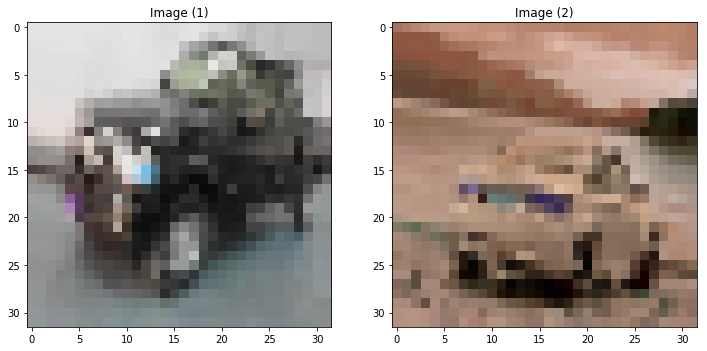



====================Prices==========================
[[5891]
 [1523]]


====================Labels==========================
[0 0]




====================Images==========================
49/85 [================>.............] - ETA: 14s - loss: 7.5665 - acc: 0.5306

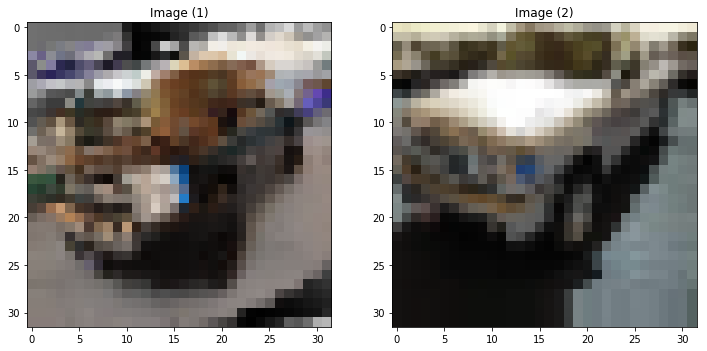



====================Prices==========================
[[6954]
 [ 703]]


====================Labels==========================
[0 0]
50/85 [================>.............] - ETA: 13s - loss: 7.4152 - acc: 0.5400



====================Images==========================


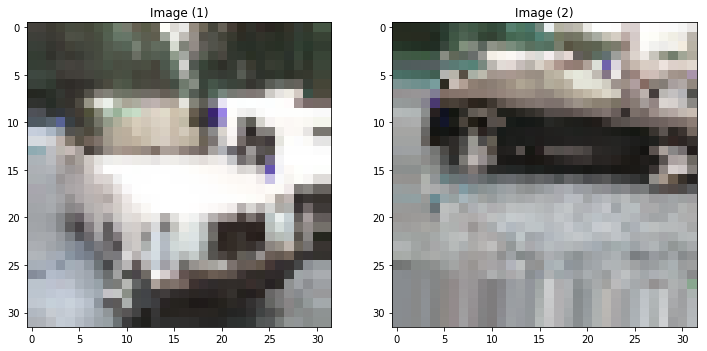



====================Prices==========================
[[7136]
 [9832]]


====================Labels==========================
[0 0]




====================Images==========================
51/85 [=================>............] - ETA: 13s - loss: 7.2698 - acc: 0.5490

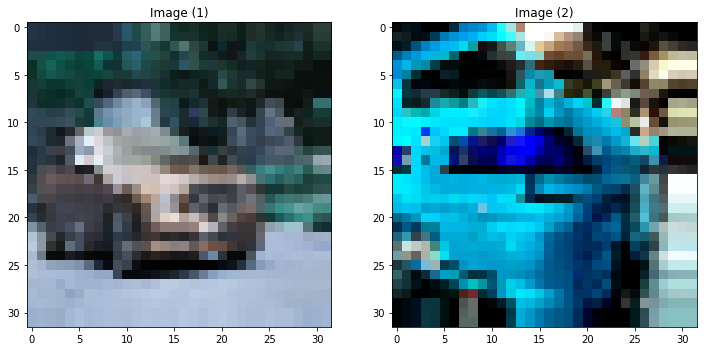



====================Prices==========================
[[9192]
 [7285]]


====================Labels==========================
[0 0]




====================Images==========================
52/85 [=================>............] - ETA: 13s - loss: 7.1300 - acc: 0.5577

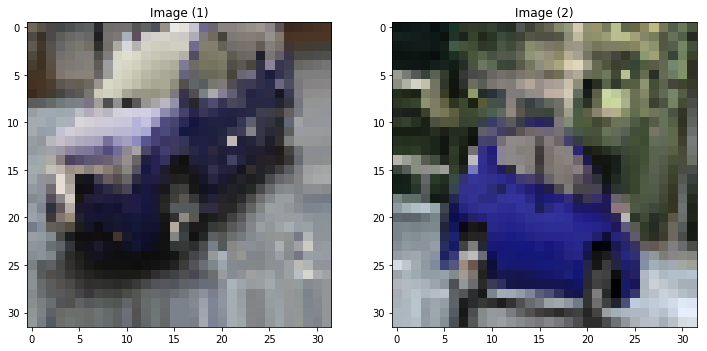



====================Prices==========================
[[6032]
 [2011]]


====================Labels==========================
[0 0]




====================Images==========================
53/85 [=================>............] - ETA: 13s - loss: 6.9954 - acc: 0.5660

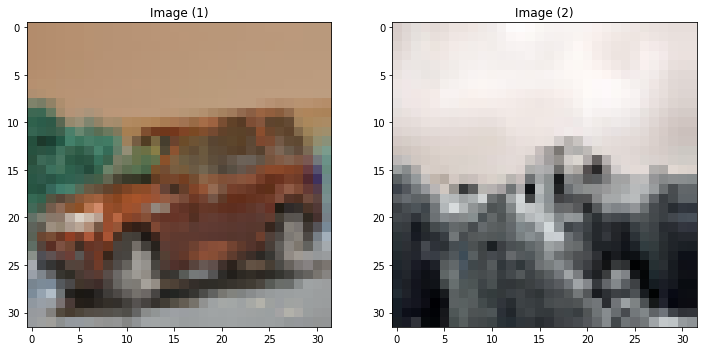



====================Prices==========================
[[926553]
 [   980]]


====================Labels==========================
[1 0]




====================Images==========================
54/85 [==================>...........] - ETA: 12s - loss: 7.0151 - acc: 0.5648

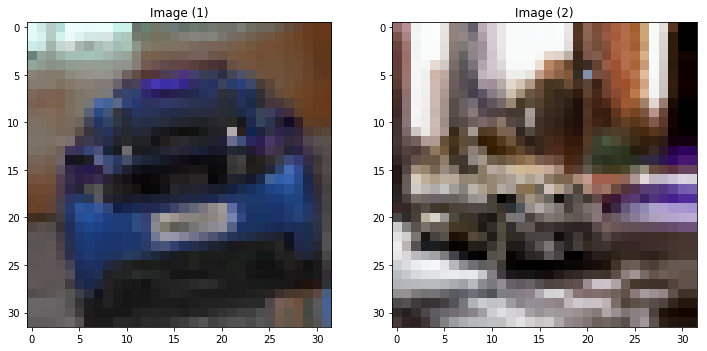



====================Prices==========================
[[702558]
 [594042]]


====================Labels==========================
[1 1]




====================Images==========================
55/85 [==================>...........] - ETA: 12s - loss: 7.1806 - acc: 0.5545

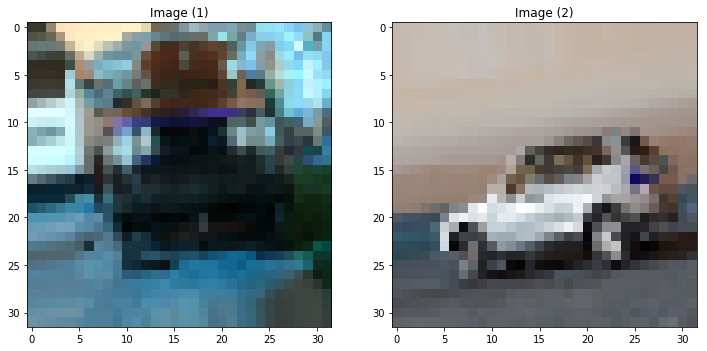



====================Prices==========================
[[2537]
 [5587]]


====================Labels==========================
[0 0]




====================Images==========================
56/85 [==================>...........] - ETA: 11s - loss: 7.0524 - acc: 0.5625

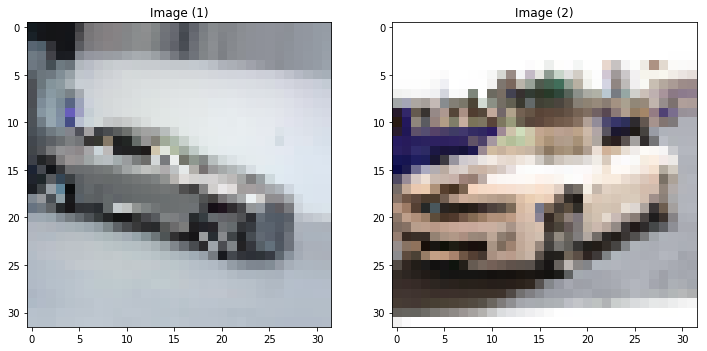



====================Prices==========================
[[ 26534]
 [478907]]


====================Labels==========================
[1 1]




====================Images==========================
57/85 [===================>..........] - ETA: 11s - loss: 7.2115 - acc: 0.5526

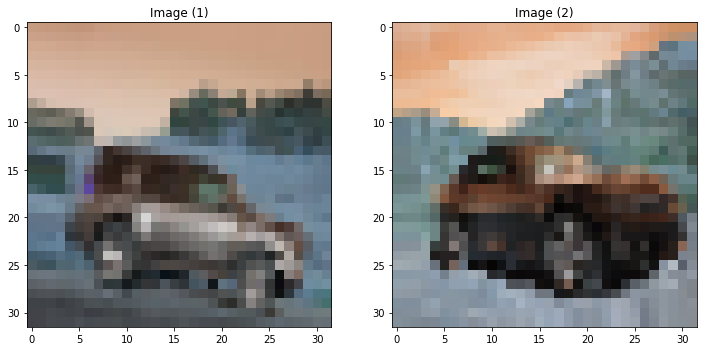



====================Prices==========================
[[  2409]
 [256523]]


====================Labels==========================
[0 1]




====================Images==========================
58/85 [===================>..........] - ETA: 10s - loss: 7.2261 - acc: 0.5517

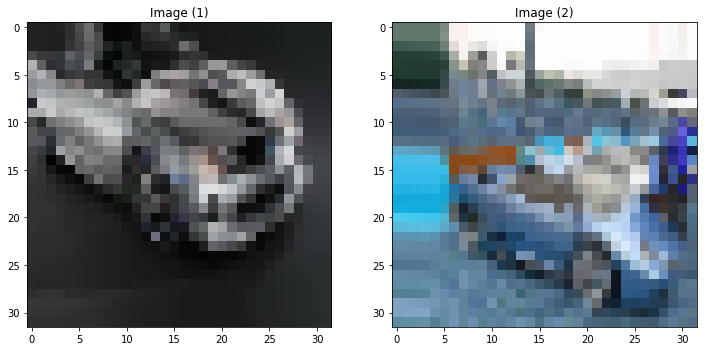



====================Prices==========================
[[507711]
 [898129]]


====================Labels==========================
[1 1]




====================Images==========================
59/85 [===================>..........] - ETA: 10s - loss: 7.3768 - acc: 0.5424

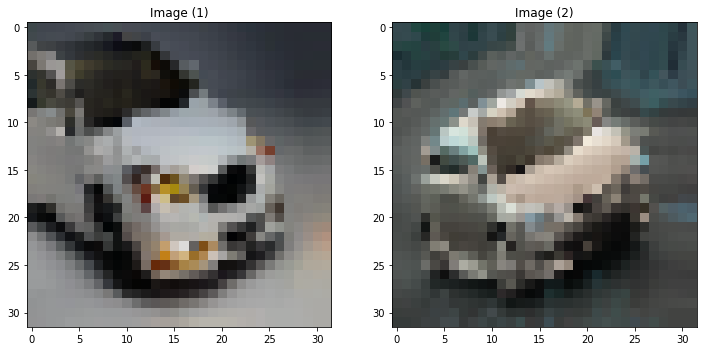



====================Prices==========================
[[1429]
 [ 160]]


====================Labels==========================
[0 0]




====================Images==========================
60/85 [====================>.........] - ETA: 10s - loss: 7.2538 - acc: 0.5500

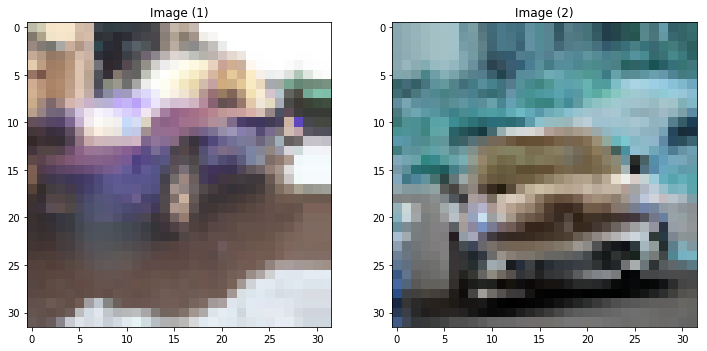



====================Prices==========================
[[   597]
 [823246]]


====================Labels==========================
[0 1]




====================Images==========================
61/85 [====================>.........] - ETA: 9s - loss: 7.2670 - acc: 0.5492 

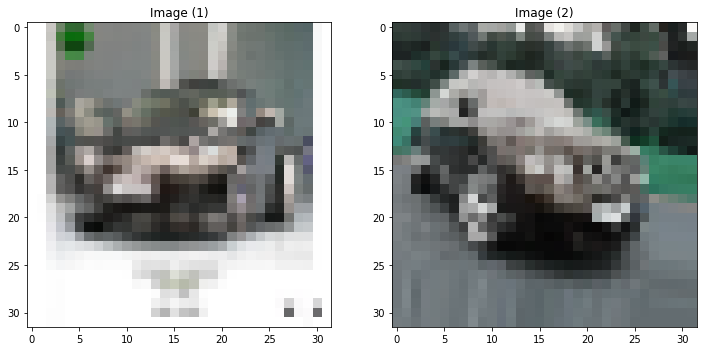



====================Prices==========================
[[874565]
 [797401]]


====================Labels==========================
[1 1]




====================Images==========================
62/85 [====================>.........] - ETA: 9s - loss: 7.4098 - acc: 0.5403

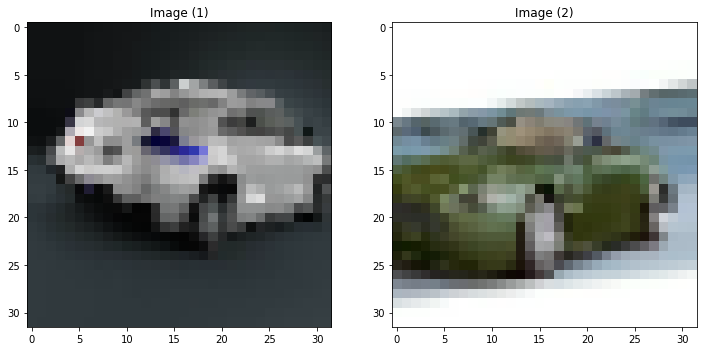



====================Prices==========================
[[960027]
 [674061]]


====================Labels==========================
[1 1]




====================Images==========================
63/85 [=====================>........] - ETA: 8s - loss: 7.5480 - acc: 0.5317

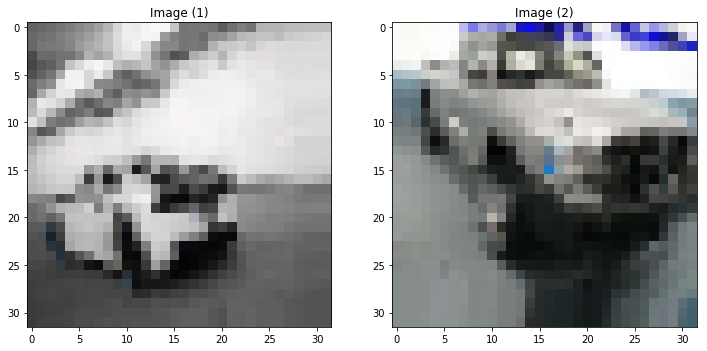



====================Prices==========================
[[676540]
 [  9114]]


====================Labels==========================
[1 0]




====================Images==========================
64/85 [=====================>........] - ETA: 8s - loss: 7.5560 - acc: 0.5312

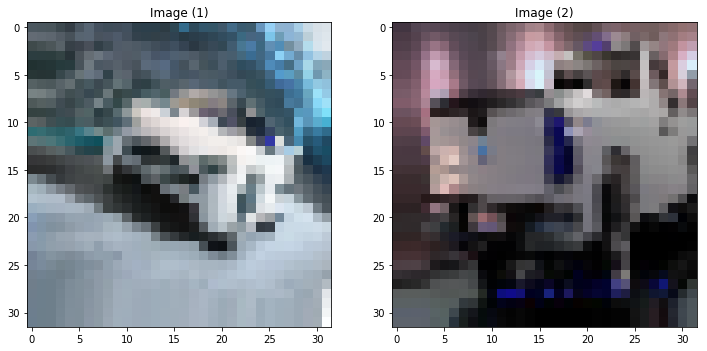



====================Prices==========================
[[147980]
 [   704]]


====================Labels==========================
[1 0]




====================Images==========================
65/85 [=====================>........] - ETA: 8s - loss: 7.5638 - acc: 0.5308

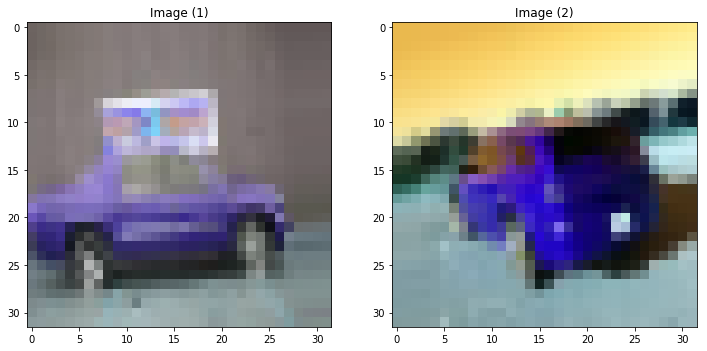



====================Prices==========================
[[  5383]
 [872910]]


====================Labels==========================
[0 1]




====================Images==========================
66/85 [======================>.......] - ETA: 7s - loss: 7.5713 - acc: 0.5303

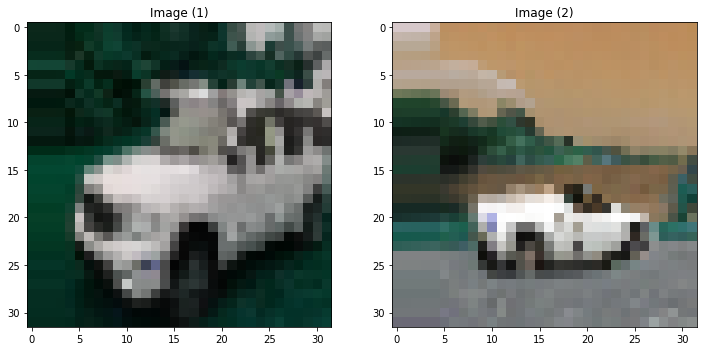



====================Prices==========================
[[  2577]
 [872116]]


====================Labels==========================
[0 1]
67/85 [======================>.......] - ETA: 7s - loss: 7.5785 - acc: 0.5299



====================Images==========================


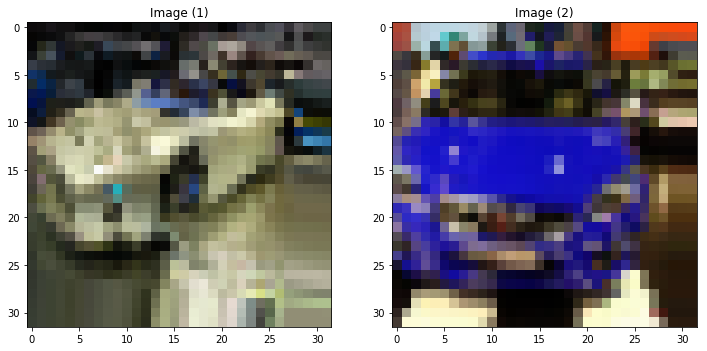



====================Prices==========================
[[204287]
 [747555]]


====================Labels==========================
[1 1]




====================Images==========================
68/85 [=======================>......] - ETA: 6s - loss: 7.7041 - acc: 0.5221

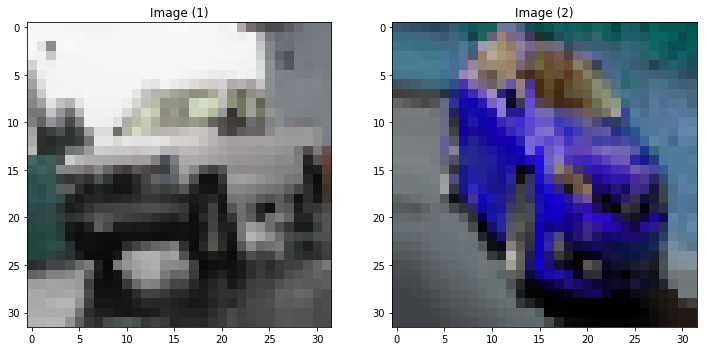



====================Prices==========================
[[2355]
 [5782]]


====================Labels==========================
[0 0]




====================Images==========================
69/85 [=======================>......] - ETA: 6s - loss: 7.5925 - acc: 0.5290

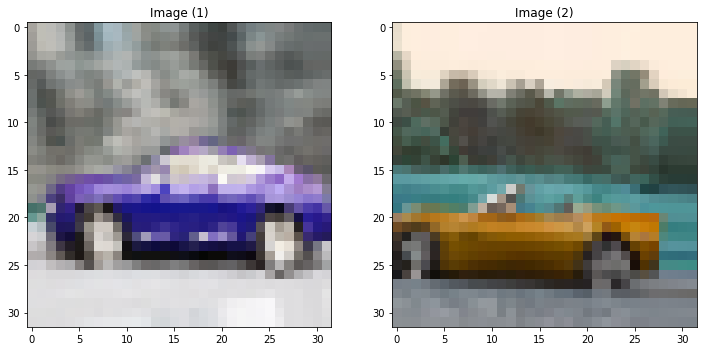



====================Prices==========================
[[974187]
 [431075]]


====================Labels==========================
[1 1]




====================Images==========================
70/85 [=======================>......] - ETA: 6s - loss: 7.7143 - acc: 0.5214

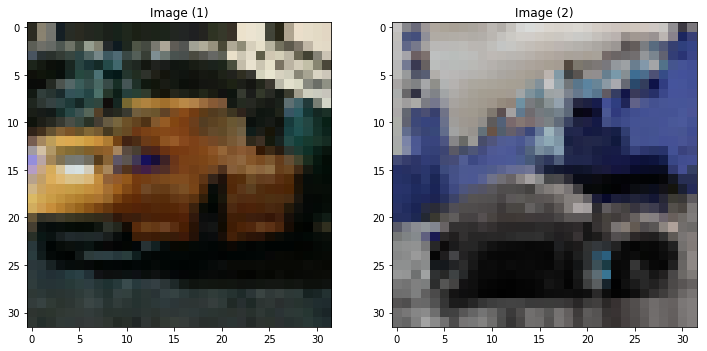



====================Prices==========================
[[ 51505]
 [978085]]


====================Labels==========================
[1 1]




====================Images==========================
71/85 [========================>.....] - ETA: 5s - loss: 7.8326 - acc: 0.5141

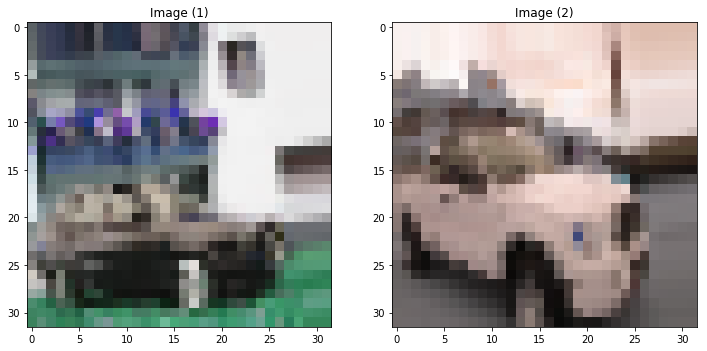



====================Prices==========================
[[1908]
 [9250]]


====================Labels==========================
[0 0]




====================Images==========================
72/85 [========================>.....] - ETA: 5s - loss: 7.7238 - acc: 0.5208

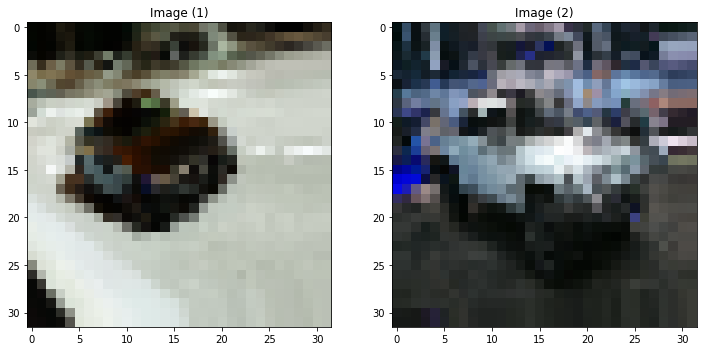



====================Prices==========================
[[434346]
 [  9514]]


====================Labels==========================
[1 0]




====================Images==========================
73/85 [========================>.....] - ETA: 4s - loss: 7.7284 - acc: 0.5205

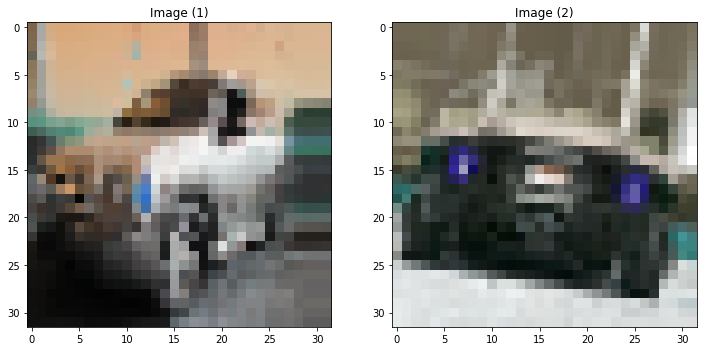



====================Prices==========================
[[  9729]
 [515664]]


====================Labels==========================
[0 1]




====================Images==========================
74/85 [=========================>....] - ETA: 4s - loss: 7.7329 - acc: 0.5203

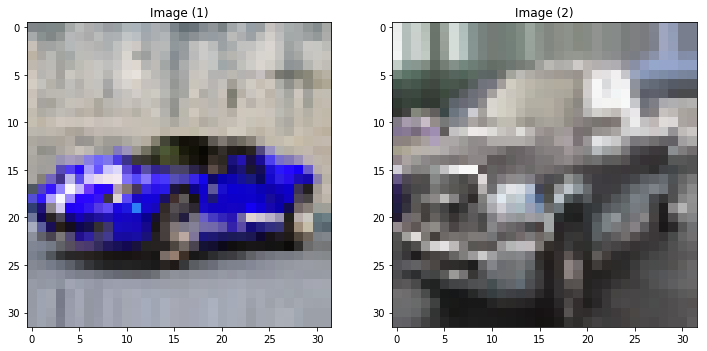



====================Prices==========================
[[131838]
 [  2378]]


====================Labels==========================
[1 0]




====================Images==========================
75/85 [=========================>....] - ETA: 4s - loss: 7.7372 - acc: 0.5200

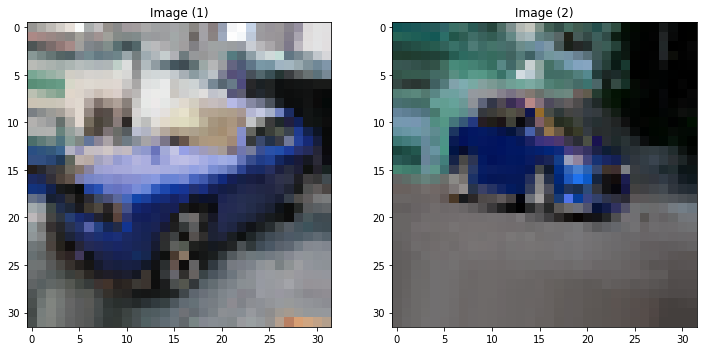



====================Prices==========================
[[173013]
 [  5802]]


====================Labels==========================
[1 0]




====================Images==========================
76/85 [=========================>....] - ETA: 3s - loss: 7.7415 - acc: 0.5197

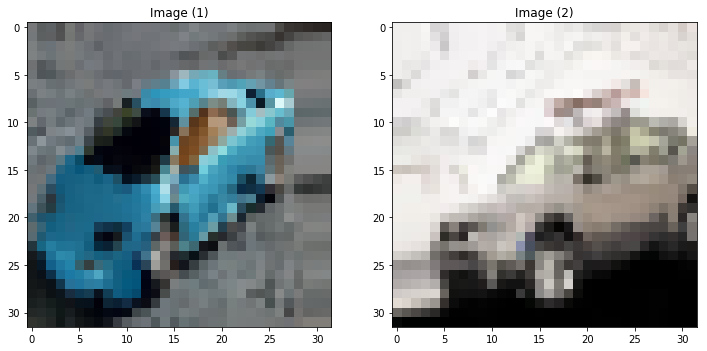



====================Prices==========================
[[866495]
 [  1239]]


====================Labels==========================
[1 0]




====================Images==========================
77/85 [==========================>...] - ETA: 3s - loss: 7.7456 - acc: 0.5195

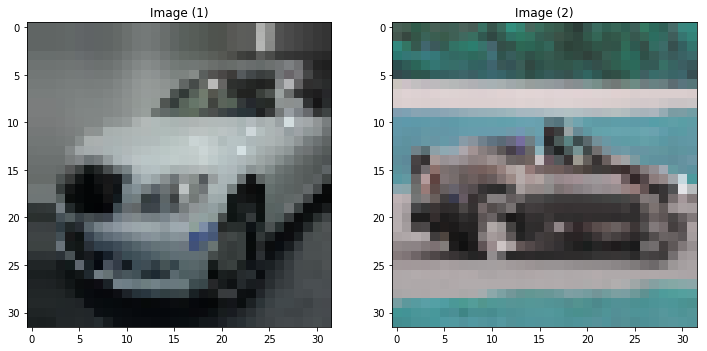



====================Prices==========================
[[ 67472]
 [195764]]


====================Labels==========================
[1 1]




====================Images==========================
78/85 [==========================>...] - ETA: 2s - loss: 7.8529 - acc: 0.5128

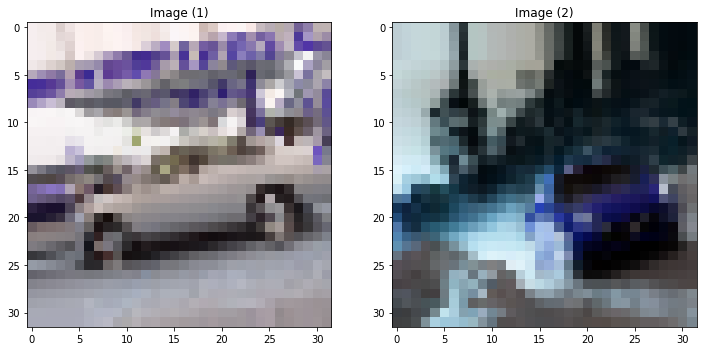



====================Prices==========================
[[   196]
 [674012]]


====================Labels==========================
[0 1]




====================Images==========================
79/85 [==========================>...] - ETA: 2s - loss: 7.8556 - acc: 0.5127

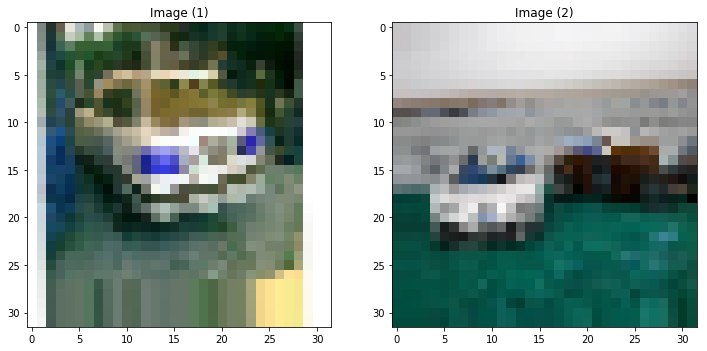



====================Prices==========================
[[  9027]
 [120610]]


====================Labels==========================
[0 1]
80/85 [===========================>..] - ETA: 2s - loss: 7.8581 - acc: 0.5125



====================Images==========================


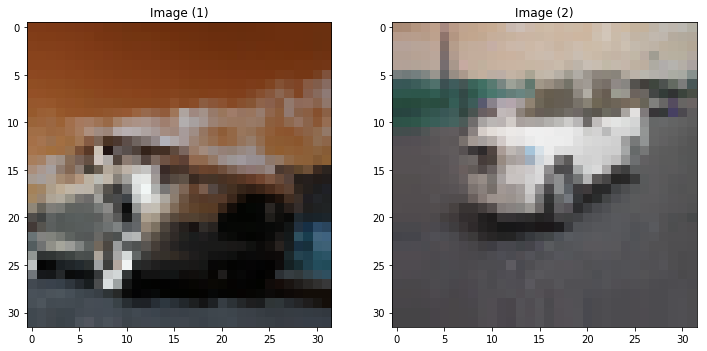



====================Prices==========================
[[524288]
 [   237]]


====================Labels==========================
[1 0]




====================Images==========================
81/85 [===========================>..] - ETA: 1s - loss: 7.8606 - acc: 0.5123

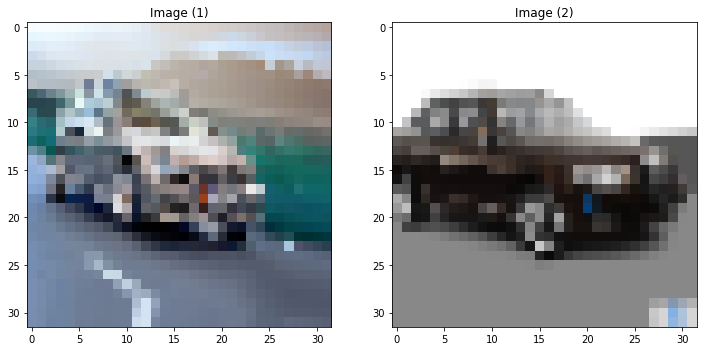



====================Prices==========================
[[376502]
 [436384]]


====================Labels==========================
[1 1]
82/85 [===========================>..] - ETA: 1s - loss: 7.9613 - acc: 0.5061



====================Images==========================


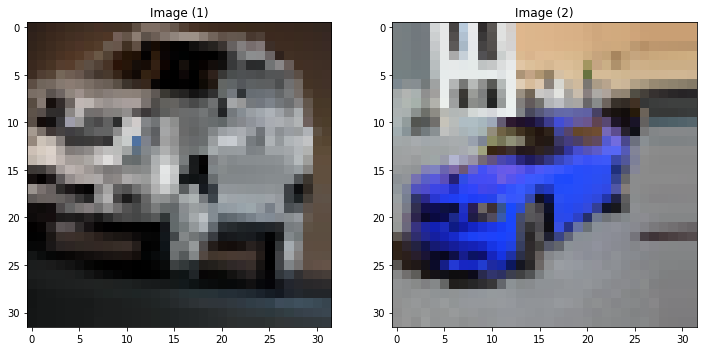



====================Prices==========================
[[273151]
 [201615]]


====================Labels==========================
[1 1]




====================Images==========================
83/85 [============================>.] - ETA: 0s - loss: 8.0596 - acc: 0.5000

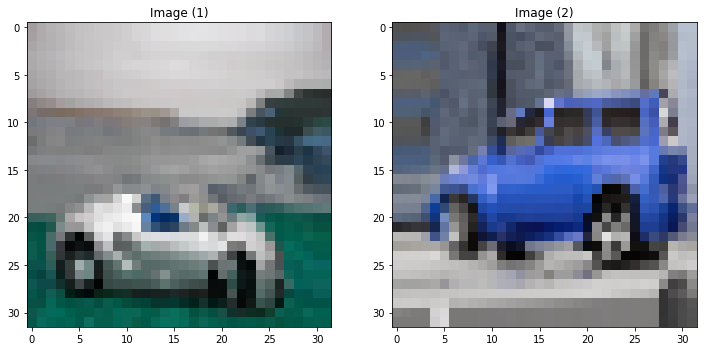



====================Prices==========================
[[588583]
 [  5250]]


====================Labels==========================
[1 0]




====================Images==========================
84/85 [============================>.] - ETA: 0s - loss: 8.0595 - acc: 0.5000

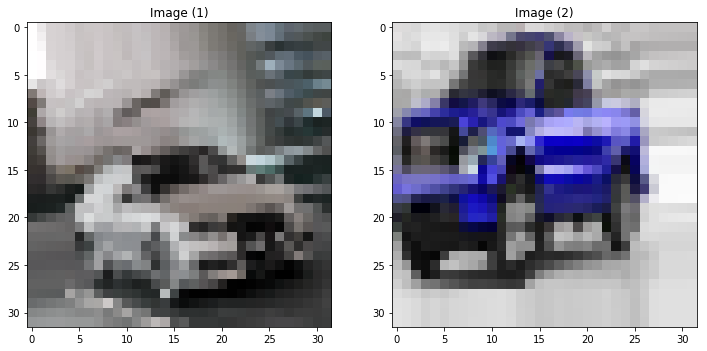



====================Prices==========================
[[822779]
 [  1723]]


====================Labels==========================
[1 0]




====================Images==========================
85/85 [==============================] - 34s 405ms/step - loss: 8.0595 - acc: 0.5000 - val_loss: 7.8524 - val_acc: 0.5128


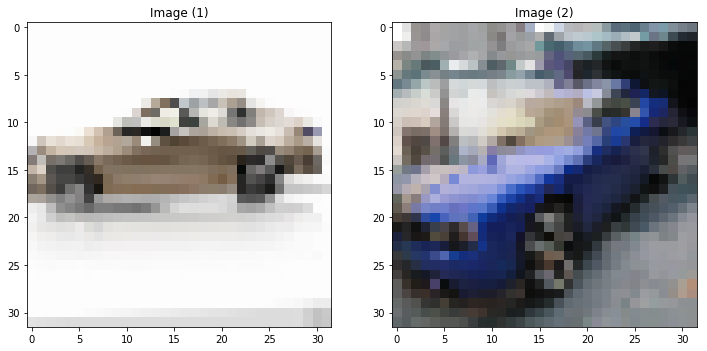



====================Prices==========================
[[  3365]
 [173013]]


====================Labels==========================
[0 1]


In [190]:
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss='binary_crossentropy', optimizer=opt,  metrics=['accuracy'])

# train the model
print("[INFO] training model...")
model.fit_generator(
       gen_flow,
       validation_data=([images_valid, prices_valid], labels_valid),
       steps_per_epoch=len(images_train) / attr.batch_size, epochs=2)
